# sectorRotationHeatmap

Update: added support to dukascopy datasource which can be download tick data if needed. Install dukascopy-node to use this function.


install node on windows:
1. '$ choco install -y nodejs-lts --force'

1. '$ npm install dukascopy-node --save'

to run all the test cases:
1. '$ cd tests'

1. '$ pytest -s --log-cli-level=INFO'

to get updated data:

1. '$ python update_data.py'

to run the model:

1. '$ python run_model.py'

Visit https://www.linkedin.com/pulse/identifying-sector-rotation-trading-signals-using-heatmap-jacky-lee on detailed description on the model.

# Running as a chat service	
You can now run this sectorRotationAdvistor in chatbot mode.  

1, Ask @botfather to create a new chatbot for you, e.g. @mySectorAdvistor and you will now be able join your own chat group and send the command 
'v <ticker>' 
to get the sectorRotation based suggestion to use. You need to have Rabbitmq and running it as services first, check out [rabbitmq](https://www.rabbitmq.com/download.html)	

2, after running service, use the web interface at http://localhost:15672/ to add a user tgbot/tgbot so that the python service can connec the rabbitmq server.

3, Start the tg chat daemon which receive 

1. 'python tgChatDaemon.py' 

When you run the the daemon, it will ask you for the tg api token, just copy and paste to the prompt and it will be saved in config
5, run the sectorRotation worker:

1. 'python rqSectorRotJobWorker.py'

    You can run multiple copies of this job to 
     now, send a message to your newly created tg group and receive the suggestion from the bot.
    
Communication between chat daemon and worker is done via a base64 encoded python dictionary object which include the userid and the chat and table image generated by the worker. User command message is dispatched to sectorRotationBot which is consumed by the worker.  
    
To check the queue status
    
1. 'rabbitmqctl list_queues' 
Listing queues for vhost / ...
name	messages
tgDictReply	0
sectorRotationBot	0
    
The worker in turn produce reply as a base64 pickle object and post it to tgDictReply queue.  The chat daemon which maintain the session with Telegram user, polls this queue and send the reply to the end user.

In [1]:
# run this to test if dukascopy downloader is working
!npx dukascopy-node -i eurusd -from 2022-11-01 -to 2022-11-29 -t h4 -f csv

----------------------------------------------------
----------------------------------------------------
Instrument:     Euro vs US Dollar
Timeframe:      h4
From date:      Nov 1, 2022, 12 AM
To date:        Nov 29, 2022, 12 AM
Price type:     bid
Volumes:        false
UTC Offset:     0
Include flats:  false
Format:         csv
----------------------------------------------------
----------------------------------------------------
âˆš File saved: download\eurusd-h4-bid-2022-11-01-2022-11-29.csv (7.46 KB)



# For Windows Users
If chocolatey and node is not already installed run the followings with admin right  in powershell

1. '$ Set-ExecutionPolicy AllSigned'

1. '$ Set-ExecutionPolicy Bypass -Scope Process -Force; iex ((New-Object System.Net.WebClient).Download'

1. "$ choco install nodejs.installString('https://chocolatey.org/install.ps1'))"

1. '$ choco install nodejs.install'

['eurcad', 'gbpusd', 'nzdusd', 'audusd', 'audnzd', 'usdjpy', 'usdchf', 'usdcad', 'usdsgd', 'eurchf', 'eurusd', 'eurusd', 'usdsgd']


,eurcad,gbpusd,nzdusd,audusd,audnzd,usdjpy,usdchf,usdcad,usdsgd,eurchf,eurusd
2022-11-30 15:00:00,6.0,7.0,11.0,10.0,3.0,5.0,4.0,2.0,1.0,8.0,9.0
2022-11-30 19:00:00,4.0,9.0,10.0,11.0,6.0,7.0,3.0,2.0,1.0,5.0,8.0
2022-11-30 23:00:00,3.0,1.0,5.0,6.0,9.0,11.0,10.0,8.0,7.0,4.0,2.0
2022-12-01 03:00:00,5.0,9.0,11.0,10.0,6.0,3.0,2.0,1.0,4.0,7.0,8.0
2022-12-01 07:00:00,6.0,9.0,11.0,10.0,5.0,1.0,3.0,2.0,4.0,7.0,8.0


heat_df.columns: DatetimeIndex(['2022-11-05 07:00:00', '2022-11-06 07:00:00',
               '2022-11-07 07:00:00', '2022-11-08 07:00:00',
               '2022-11-09 07:00:00', '2022-11-10 07:00:00',
               '2022-11-11 07:00:00', '2022-11-12 07:00:00',
               '2022-11-13 07:00:00', '2022-11-14 07:00:00',
               '2022-11-15 07:00:00', '2022-11-16 07:00:00',
               '2022-11-17 07:00:00', '2022-11-18 07:00:00',
               '2022-11-19 07:00:00', '2022-11-20 07:00:00',
               '2022-11-21 07:00:00', '2022-11-22 07:00:00',
               '2022-11-23 07:00:00', '2022-11-24 07:00:00',
               '2022-11-25 07:00:00', '2022-11-26 07:00:00',
               '2022-11-27 07:00:00', '2022-11-28 07:00:00',
               '2022-11-29 07:00:00', '2022-11-30 07:00:00',
               '2022-12-01 07:00:00'],
              dtype='datetime64[ns]', freq=None)


,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1201
nzdusd,110,50,10,100,90,30,100,110,110,30,40,70,20,80,20,65,110,10,80,90,30,40,65,20,20,30,110
audusd,100,50,20,80,80,20,110,80,60,40,50,80,10,40,10,65,100,20,100,110,100,100,65,10,40,20,100
gbpusd,80,50,30,110,100,10,90,90,60,10,30,90,80,70,40,65,50,100,90,100,20,80,10,30,10,10,90
eurusd,90,105,40,90,110,50,80,100,60,20,60,20,40,60,30,65,90,60,110,80,40,50,65,40,30,40,80
eurchf,60,50,60,60,70,40,50,20,60,60,10,30,70,110,70,65,30,80,50,50,80,10,65,50,60,60,70
eurcad,70,50,50,70,60,100,70,70,60,50,100,10,100,30,50,65,70,70,70,70,10,60,20,70,50,80,60
audnzd,50,50,80,30,50,60,60,40,60,80,80,60,30,10,60,65,40,90,60,60,110,20,65,60,80,50,50
usdsgd,30,105,110,20,40,80,40,50,60,90,70,110,60,50,90,65,60,40,40,40,60,30,65,110,90,70,40
usdchf,10,50,90,10,30,70,20,10,10,100,20,100,90,100,110,20,10,50,10,20,90,90,65,80,110,100,30
usdcad,20,50,100,50,20,110,30,60,60,70,110,50,110,20,80,110,80,30,20,30,50,110,65,100,100,110,20


,eurcad,gbpusd,nzdusd,audusd,audnzd,usdjpy,usdchf,usdcad,usdsgd,eurchf,eurusd
2022-11-30 15:00:00,6.0,7.0,11.0,10.0,3.0,5.0,4.0,2.0,1.0,8.0,9.0
2022-11-30 19:00:00,4.0,9.0,10.0,11.0,6.0,7.0,3.0,2.0,1.0,5.0,8.0
2022-11-30 23:00:00,3.0,1.0,5.0,6.0,9.0,11.0,10.0,8.0,7.0,4.0,2.0
2022-12-01 03:00:00,5.0,9.0,11.0,10.0,6.0,3.0,2.0,1.0,4.0,7.0,8.0
2022-12-01 07:00:00,6.0,9.0,11.0,10.0,5.0,1.0,3.0,2.0,4.0,7.0,8.0


latest rpdf: timestamp    1.669838e+12
Open         1.767647e+03
High         1.773348e+03
Low          1.766098e+03
Close        1.773248e+03
Volume       1.300000e+01
Name: 2022-12-01 07:00:00, dtype: float64 
now in test getting in batch sector eurusd


count    162.000000
mean       0.104938
std        0.345477
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lbm_7_bigmove, dtype: float64

count    162.000000
mean       0.172840
std        0.480427
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_eurcad', 'i_eurcad_d', 'i_eurcad_d2', 'i_gbpusd', 'i_gbpusd_d', 'i_gbpusd_d2', 'i_nzdusd', 'i_nzdusd_d', 'i_nzdusd_d2', 'i_audusd', 'i_audusd_d', 'i_audusd_d2', 'i_audnzd', 'i_audnzd_d', 'i_audnzd_d2', 'i_usdjpy', 'i_usdjpy_d', 'i_usdjpy_d2', 'i_usdchf', 'i_usdchf_d', 'i_usdchf_d2', 'i_usdcad', 'i_usdcad_d', 'i_usdcad_d2', 'i_usdsgd', 'i_usdsgd_d', 'i_usdsgd_d2', 'i_eurchf', 'i_eurchf_d', 'i_eurchf_d2', 'i_eurusd', 'i_eurusd_d', 'i_eurusd_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:xauusd
long eurusd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-12-01 03:00:00  0.454545    0.181818     0.272727  0.818182    0.727273   
2022-12-01 07:00:00  0.545455   

count    32.000000
mean      0.250000
std       0.439941
min       0.000000
25%       0.000000
50%       0.000000
75%       0.250000
max       1.000000
Name: _lb_7_spikeup, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_eurcad': 101.0, 'i_eurcad_d2': 100.0, 'i_gbpusd': 100.0, 'i_gbpusd_d': 2.0, 'i_gbpusd_d2': 100.0, 'i_nzdusd': 102.0, 'i_nzdusd_d': 2.0, 'i_audnzd_d': 199.0, 'i_usdchf_d2': 99.0, 'i_usdsgd': 100.0, 'i_usdsgd_d': 100.0, 'i_usdsgd_d2': 1.0, 'i_eurchf': 100.0, 'i_eurchf_d2': 198.0}
unique_y: ([0, 1],

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_eurchf,0.272486
1,i_eurchf_d2,0.147065
2,i_usdchf_d2,0.078758
3,i_audnzd_d,0.073941
4,i_usdsgd,0.072935


 pred_flag:
long eurusd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-12-01 03:00:00  0.454545    0.181818     0.272727  0.818182    0.727273   
2022-12-01 07:00:00  0.545455    0.090909    -0.090909  0.818182    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-12-01 03:00:00     1.454545       1.0    0.545455     1.000000  0.909091   
2022-12-01 07:00:00    -0.727273       1.0    0.000000    -0.545455  0.909091   

                     ...  Volume  _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-12-01 03:00:00  ...      15      NaN              0              0   
2022-12-01 07:00:00  ...      10      NaN              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-12-01 03:00:00        NaN         NaN                0              0   
2022-12-01 07:00:00        NaN         NaN                0              0   

                 

count    32.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: _lb_7_bigrise, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_eurcad_d2': 18.0, 'i_gbpusd_d': 18.0, 'i_nzdusd': 22.0, 'i_nzdusd_d2': 41.0, 'i_audusd_d': 119.0, 'i_audnzd': 100.0, 'i_usdjpy_d': 82.0, 'i_usdcad': 18.0, 'i_usdsgd_d2': 200.0, 'i_eurchf': 100.0}
unique_y: ([0, 1], (130,), (32,), (32, 33))
pred 1 is [0 0 0 0 0 0 1 0 0 0] 32 
pred fixed is [0, 0, 

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackylee/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackylee/miniforge3/lib/python3.9/site-packages/sklearn/metri

,name,imp_val
0,i_eurchf,0.487579
1,i_nzdusd_d2,0.090812
2,i_usdsgd_d2,0.083017
3,i_usdjpy_d,0.076420
4,i_gbpusd_d,0.071153


 pred_flag:
long eurusd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-12-01 03:00:00  0.454545    0.181818     0.272727  0.818182    0.727273   
2022-12-01 07:00:00  0.545455    0.090909    -0.090909  0.818182    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-12-01 03:00:00     1.454545       1.0    0.545455     1.000000  0.909091   
2022-12-01 07:00:00    -0.727273       1.0    0.000000    -0.545455  0.909091   

                     ...  Volume  _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-12-01 03:00:00  ...      15      NaN              0              0   
2022-12-01 07:00:00  ...      10      NaN              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-12-01 03:00:00        NaN         NaN                0              0   
2022-12-01 07:00:00        NaN         NaN                0              0   

                 

count    32.000000
mean      0.031250
std       0.176777
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: _lb_7_bigdrop, dtype: float64

loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_gbpusd_d': 50.0, 'i_eurusd_d': 50.0}
unique_y: ([0, 1], (130,), (32,), (32, 33))
pred 1 is [0 0 0 0 0 0 0 1 0 0] 32 
pred fixed is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] 32 
test_classes_names: names, dict, ilist (['drop', 'sideway'], {-1: 'drop', 0: 'drop', 1: 'sideway', 2: 'rise', 3: 'rise'}, [0, 1], [

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

,name,imp_val
0,i_gbpusd_d,0.500001
1,i_eurusd_d,0.499999
2,i_eurcad,0.000000
3,i_usdsgd,0.000000
4,i_usdchf_d,0.000000


 pred_flag:
eurusd results:
dict_keys(['catboost._lb_7_spikeup.long', 'catboost._lb_7_bigrise.long', 'catboost._lb_7_bigdrop.short'])


,eurusd.catboost._lb_7_spikeup.long,eurusd.catboost._lb_7_bigrise.long,eurusd.catboost._lb_7_bigdrop.short
trade_type,long,long,short
rticker,xauusd,xauusd,xauusd
mean_max_drawdown,-0.007745,-0.005839,-0.013596
mean_drawdown,-0.005195,-0.004808,-0.012798
median_drawdown,-0.005195,-0.004808,-0.012798
mean_drawdown_day,1 days 01:05:27.272727272,0 days 22:24:00,0 days 08:00:00
median_drawdown_day,1 days 01:05:27.272727272,0 days 22:24:00,0 days 08:00:00
mean_peakprofit,0.002708,0.00104,0.000787
median_peakprofit,0.002708,0.00104,0.000787
mean_peakprofit_day,0 days 01:05:27.272727272,0 days 00:48:00,0 days 04:00:00


now in test getting in batch sector usdsgd


count    162.000000
mean      -0.061728
std        0.241408
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.000000
Name: _lbm_7_bigmove, dtype: float64

count    162.000000
mean      -0.061728
std        0.241408
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_eurcad', 'i_eurcad_d', 'i_eurcad_d2', 'i_gbpusd', 'i_gbpusd_d', 'i_gbpusd_d2', 'i_nzdusd', 'i_nzdusd_d', 'i_nzdusd_d2', 'i_audusd', 'i_audusd_d', 'i_audusd_d2', 'i_audnzd', 'i_audnzd_d', 'i_audnzd_d2', 'i_usdjpy', 'i_usdjpy_d', 'i_usdjpy_d2', 'i_usdchf', 'i_usdchf_d', 'i_usdchf_d2', 'i_usdcad', 'i_usdcad_d', 'i_usdcad_d2', 'i_usdsgd', 'i_usdsgd_d', 'i_usdsgd_d2', 'i_eurchf', 'i_eurchf_d', 'i_eurchf_d2', 'i_eurusd', 'i_eurusd_d', 'i_eurusd_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:xauusd
long usdsgd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-12-01 03:00:00  0.454545    0.181818     0.272727  0.818182    0.727273   
2022-12-01 07:00:00  0.545455   

count    32.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: _lb_7_spikeup, dtype: float64

loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{}
unique_y: ([0], (130,), (32,), (32, 33))
pred 1 is [0 0 0 0 0 0 0 0 0 0] 32 
pred fixed is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 32 
test_classes_names: names, dict, ilist (['True', 'False'], {-1: 'drop', 0: 'drop', 1: 'sideway', 2: 'rise', 3: 'rise'}, [0], [0])
score2:[[32]]
re               precision  

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

,name,imp_val
0,i_eurcad,0.0
1,i_usdjpy_d2,0.0
2,i_eurusd_d,0.0
3,i_eurusd,0.0
4,i_eurchf_d2,0.0


 pred_flag:
long usdsgd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-12-01 03:00:00  0.454545    0.181818     0.272727  0.818182    0.727273   
2022-12-01 07:00:00  0.545455    0.090909    -0.090909  0.818182    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-12-01 03:00:00     1.454545       1.0    0.545455     1.000000  0.909091   
2022-12-01 07:00:00    -0.727273       1.0    0.000000    -0.545455  0.909091   

                     ...  Volume  _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-12-01 03:00:00  ...      13      NaN              0              0   
2022-12-01 07:00:00  ...      14      NaN              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-12-01 03:00:00        NaN         NaN                0              0   
2022-12-01 07:00:00        NaN         NaN                0              0   

                 

count    32.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: _lb_7_bigrise, dtype: float64

loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{}
unique_y: ([0], (130,), (32,), (32, 33))
pred 1 is [0 0 0 0 0 0 0 0 0 0] 32 
pred fixed is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 32 
test_classes_names: names, dict, ilist (['True', 'False'], {-1: 'drop', 0: 'drop', 1: 'sideway', 2: 'rise', 3: 'rise'}, [0], [0])
score2:[[32]]
re               precision  

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

,name,imp_val
0,i_eurcad,0.0
1,i_usdjpy_d2,0.0
2,i_eurusd_d,0.0
3,i_eurusd,0.0
4,i_eurchf_d2,0.0


 pred_flag:
long usdsgd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-12-01 03:00:00  0.454545    0.181818     0.272727  0.818182    0.727273   
2022-12-01 07:00:00  0.545455    0.090909    -0.090909  0.818182    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-12-01 03:00:00     1.454545       1.0    0.545455     1.000000  0.909091   
2022-12-01 07:00:00    -0.727273       1.0    0.000000    -0.545455  0.909091   

                     ...  Volume  _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-12-01 03:00:00  ...      13      NaN              0              0   
2022-12-01 07:00:00  ...      14      NaN              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-12-01 03:00:00        NaN         NaN                0              0   
2022-12-01 07:00:00        NaN         NaN                0              0   

                 

count    32.000000
mean      0.031250
std       0.176777
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: _lb_7_bigdrop, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_gbpusd': 13.0, 'i_nzdusd': 14.0, 'i_usdjpy': 86.0, 'i_usdjpy_d2': 2.0, 'i_usdcad': 100.0, 'i_usdcad_d': 100.0, 'i_usdsgd': 86.0, 'i_usdsgd_d': 87.0, 'i_eurchf': 14.0}
unique_y: ([0, 1], (130,), (32,), (32, 33))
pred 1 is [0 0 0 1 0 1 0 0 1 0] 32 
pred fixed is [0, 0, 0, 1, 0, 1, 0, 0, 1, 0] 32 
t

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_usdcad,0.433646
1,i_nzdusd,0.126646
2,i_usdsgd,0.113681
3,i_usdsgd_d,0.113049
4,i_usdcad_d,0.112331


 pred_flag:
usdsgd results:
dict_keys(['catboost._lb_7_bigdrop.short'])


,usdsgd.catboost._lb_7_bigdrop.short
annualized_gain,2.783143
best_entry,2022-11-30 07:00:00
best_exit,2022-12-01 07:00:00
best_pct_profit,0.011634
best_ticker,usdsgd
best_trade,trade_type short tick...
best_trade_drawdown,-0.000836
duration,2.5
end_exit,2022-12-01 07:00:00
exposure_adjusted_annualized_gain,1.159643


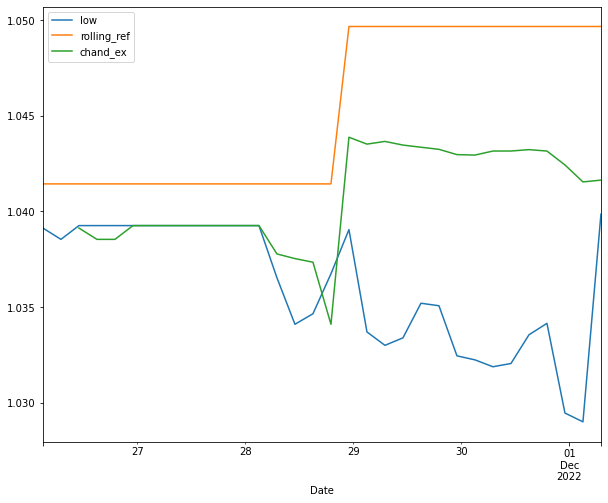

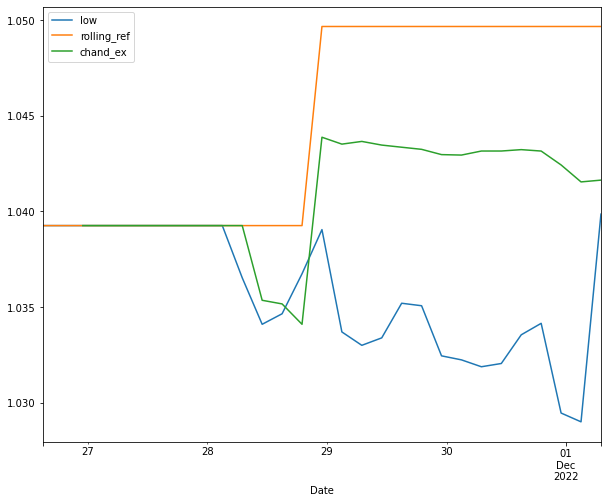

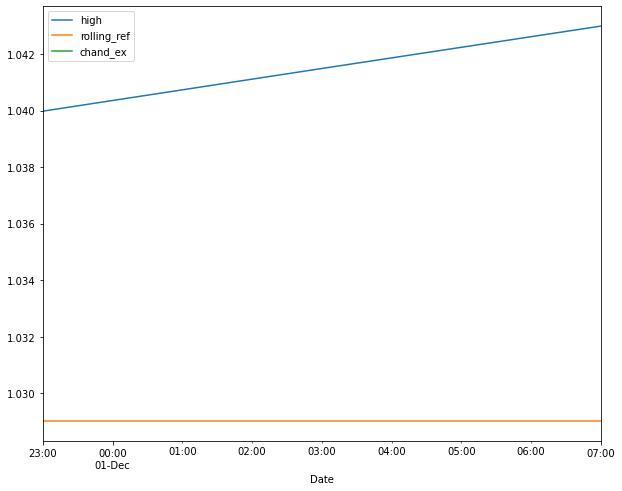

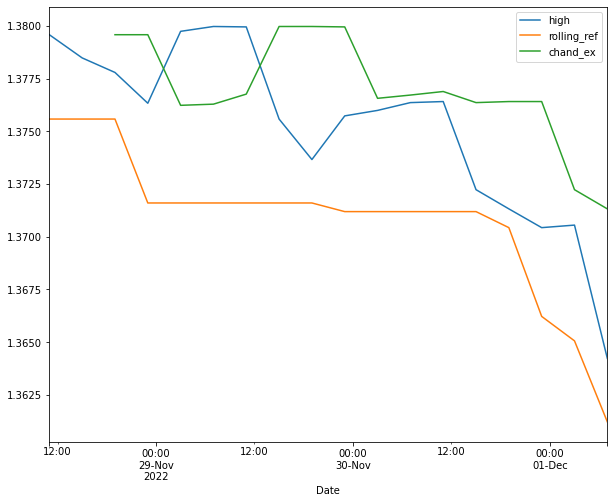

In [6]:

from workflow.sectorRotationTraderWorkflow import run_forex_worflow
past_perf_df, latest_trades_df, pred_df=run_forex_worflow(pred_date=None, use_dukas=True, focus_tlist=['eurusd', 'usdsgd'])

In [7]:
past_perf_df, latest_trades_df, 
pred_df


,y,pred_y,signame,longshort,ticker
2022-11-26 03:00:00,0,1,catboost._lb_7_spikeup.long,long,eurusd
2022-11-26 07:00:00,0,1,catboost._lb_7_spikeup.long,long,eurusd
2022-11-26 11:00:00,0,1,catboost._lb_7_spikeup.long,long,eurusd
2022-11-26 15:00:00,0,1,catboost._lb_7_spikeup.long,long,eurusd
2022-11-26 19:00:00,0,1,catboost._lb_7_spikeup.long,long,eurusd
...,...,...,...,...,...
2022-11-30 15:00:00,0,1,catboost._lb_7_bigdrop.short,short,usdsgd
2022-11-30 19:00:00,0,0,catboost._lb_7_bigdrop.short,short,usdsgd
2022-11-30 23:00:00,0,0,catboost._lb_7_bigdrop.short,short,usdsgd
2022-12-01 03:00:00,0,1,catboost._lb_7_bigdrop.short,short,usdsgd


data for UUP shape:(3973, 7), late:2022-12-07 00:00:00
['EURUSD=X', 'GBPUSD=X', 'NZDUSD=X', 'AUDUSD=X', 'AUDNZD=X', 'USDJPY=X', 'USDCHF=X', 'USDCAD=X', 'USDSGD=x', 'YCL', 'ULE']


,EURUSD=X,GBPUSD=X,NZDUSD=X,AUDUSD=X,AUDNZD=X,USDJPY=X,USDCHF=X,USDCAD=X,USDSGD=x,YCL,ULE
2022-11-25,6.0,9.0,8.0,7.0,5.0,1.0,2.0,3.0,4.0,11.0,10.0
2022-11-28,6.0,10.0,9.0,8.0,2.0,1.0,3.0,7.0,5.0,11.0,4.0
2022-11-29,6.0,4.0,2.0,1.0,7.0,5.0,9.0,10.0,8.0,11.0,3.0
2022-11-30,2.0,1.0,4.0,3.0,7.0,6.0,8.0,10.0,5.0,11.0,9.0
2022-12-01,6.0,8.0,9.0,7.0,4.0,1.0,3.0,5.0,2.0,11.0,10.0


heat_df.columns: DatetimeIndex(['2022-05-12', '2022-05-19', '2022-05-26', '2022-06-02',
               '2022-06-09', '2022-06-16', '2022-06-23', '2022-06-30',
               '2022-07-07', '2022-07-14', '2022-07-21', '2022-07-28',
               '2022-08-04', '2022-08-11', '2022-08-18', '2022-08-25',
               '2022-09-01', '2022-09-08', '2022-09-15', '2022-09-22',
               '2022-09-29', '2022-10-06', '2022-10-13', '2022-10-20',
               '2022-10-27', '2022-11-03', '2022-11-10', '2022-11-17',
               '2022-11-24', '2022-12-01'],
              dtype='datetime64[ns]', freq=None)


,0512,0519,0526,0602,0609,0616,0623,0630,0707,0714,0721,0728,0804,0811,0818,0825,0901,0908,0915,0922,0929,1006,1013,1020,1027,1103,1110,1117,1124,1201
YCL,110,100,80,10,10,110,60,80,60,10,90,110,70,110,10,110,10,10,60,100,30,30,10,10,70,60,110,10,10,110
ULE,10,110,110,90,20,100,40,20,10,20,100,50,110,80,20,40,20,100,40,10,110,10,110,60,60,10,100,70,70,100
NZDUSD=X,30,40,100,40,30,50,20,40,50,50,80,70,50,100,40,30,50,40,10,20,60,110,60,90,80,70,60,90,90,90
GBPUSD=X,40,80,90,20,60,10,50,10,30,40,60,100,30,70,50,20,30,70,50,40,20,100,80,20,110,20,40,110,80,80
AUDUSD=X,20,60,60,60,40,80,10,50,40,30,110,90,10,90,30,70,40,30,20,50,40,80,30,50,100,30,70,80,70,70
EURUSD=X,60,90,70,30,70,30,100,30,20,60,70,60,20,60,60,10,80,90,30,30,80,90,40,40,90,40,90,100,60,60
USDCAD=X,90,30,50,50,50,60,80,70,100,80,10,20,80,30,100,50,90,60,110,110,70,50,90,70,40,110,50,60,40,50
AUDNZD=X,70,70,20,100,90,90,70,90,70,70,50,80,40,50,70,90,60,50,90,70,50,20,20,30,50,50,80,50,30,40
USDCHF=X,100,10,10,80,100,70,30,60,110,90,20,10,100,10,90,100,110,20,80,60,10,60,70,100,20,100,10,30,10,30
USDSGD=x,80,50,40,70,80,40,90,100,90,100,30,30,60,40,80,60,70,80,100,80,90,40,50,80,30,90,20,40,50,20


,EURUSD=X,GBPUSD=X,NZDUSD=X,AUDUSD=X,AUDNZD=X,USDJPY=X,USDCHF=X,USDCAD=X,USDSGD=x,YCL,ULE
2022-11-25,6.0,9.0,8.0,7.0,5.0,1.0,2.0,3.0,4.0,11.0,10.0
2022-11-28,6.0,10.0,9.0,8.0,2.0,1.0,3.0,7.0,5.0,11.0,4.0
2022-11-29,6.0,4.0,2.0,1.0,7.0,5.0,9.0,10.0,8.0,11.0,3.0
2022-11-30,2.0,1.0,4.0,3.0,7.0,6.0,8.0,10.0,5.0,11.0,9.0
2022-12-01,6.0,8.0,9.0,7.0,4.0,1.0,3.0,5.0,2.0,11.0,10.0


latest rpdf: Open            2.837000e+01
High            2.846000e+01
Low             2.835000e+01
Close           2.839000e+01
Volume          2.869500e+06
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-12-07 00:00:00, dtype: float64 
now in test getting in batch sector YCL


count    3520.000000
mean       -0.027557
std         0.528346
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigmove, dtype: float64

count    3520.000000
mean       -0.039205
std         0.679875
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_EURUSD=X', 'i_EURUSD=X_d', 'i_EURUSD=X_d2', 'i_GBPUSD=X', 'i_GBPUSD=X_d', 'i_GBPUSD=X_d2', 'i_NZDUSD=X', 'i_NZDUSD=X_d', 'i_NZDUSD=X_d2', 'i_AUDUSD=X', 'i_AUDUSD=X_d', 'i_AUDUSD=X_d2', 'i_AUDNZD=X', 'i_AUDNZD=X_d', 'i_AUDNZD=X_d2', 'i_USDJPY=X', 'i_USDJPY=X_d', 'i_USDJPY=X_d2', 'i_USDCHF=X', 'i_USDCHF=X_d', 'i_USDCHF=X_d2', 'i_USDCAD=X', 'i_USDCAD=X_d', 'i_USDCAD=X_d2', 'i_USDSGD=x', 'i_USDSGD=x_d', 'i_USDSGD=x_d2', 'i_YCL', 'i_YCL_d', 'i_YCL_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:UUP
long YCL at cat boost:            i_EURUSD=X  i_EURUSD=X_d  i_EURUSD=X_d2  i_GBPUSD=X  i_GBPUSD=X_d  \
2022-11-30    0.181818     -0.363636      -0.363636    0.090909     -0.272727   
2022-12-01    0.545455      0.36

count    465.000000
mean       0.139785
std        0.347137
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_spikeup, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_EURUSD=X': 59.0, 'i_EURUSD=X_d': 39.0, 'i_EURUSD=X_d2': 97.0, 'i_GBPUSD=X': 60.0, 'i_GBPUSD=X_d': 15.0, 'i_GBPUSD=X_d2': 38.0, 'i_NZDUSD=X': 56.0, 'i_NZDUSD=X_d2': 20.0, 'i_AUDUSD=X': 13.0, 'i_AUDUSD=X_d': 77.0, 'i_AUDUSD=X_d2': 90.0, 'i_AUDNZD=X': 57.0, 'i_AUDNZD=X_d': 75.0, 'i_AUDNZD=X_d2': 67.

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_USDCAD=X_d,0.063421
1,i_AUDUSD=X_d2,0.057213
2,i_GBPUSD=X_d2,0.057205
3,i_YCL,0.054013
4,i_USDCAD=X,0.052435


 pred_flag:
long YCL at cat boost:            i_EURUSD=X  i_EURUSD=X_d  i_EURUSD=X_d2  i_GBPUSD=X  i_GBPUSD=X_d  \
2022-11-30    0.181818     -0.363636      -0.363636    0.090909     -0.272727   
2022-12-01    0.545455      0.363636       0.727273    0.727273      0.636364   

            i_GBPUSD=X_d2  i_NZDUSD=X  i_NZDUSD=X_d  i_NZDUSD=X_d2  \
2022-11-30       0.272727    0.363636      0.181818       0.818182   
2022-12-01       0.909091    0.818182      0.454545       0.272727   

            i_AUDUSD=X  ...  Stock Splits  _n_ret7  _lb_7_bigrise  \
2022-11-30    0.272727  ...           0.0      NaN              0   
2022-12-01    0.636364  ...           0.0      NaN              0   

            _lb_7_bigdrop  _n_7d_low  _n_7d_high  _lb_7_spikedown  \
2022-11-30              0        NaN         NaN                0   
2022-12-01              0        NaN         NaN                0   

            _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2022-11-30              0         

count    465.000000
mean       0.058065
std        0.234117
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigrise, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_EURUSD=X': 28.0, 'i_EURUSD=X_d': 4.0, 'i_EURUSD=X_d2': 35.0, 'i_GBPUSD=X': 117.0, 'i_GBPUSD=X_d': 97.0, 'i_GBPUSD=X_d2': 61.0, 'i_NZDUSD=X': 69.0, 'i_NZDUSD=X_d': 109.0, 'i_NZDUSD=X_d2': 6.0, 'i_AUDUSD=X': 51.0, 'i_AUDUSD=X_d': 112.0, 'i_AUDUSD=X_d2': 158.0, 'i_AUDNZD=X': 100.0, 'i_AUDNZD=X_d2': 

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_AUDUSD=X_d,0.086652
1,i_AUDUSD=X_d2,0.063018
2,i_YCL_d2,0.057477
3,i_YCL_d,0.057186
4,i_YCL,0.057150


 pred_flag:
long YCL at cat boost:            i_EURUSD=X  i_EURUSD=X_d  i_EURUSD=X_d2  i_GBPUSD=X  i_GBPUSD=X_d  \
2022-11-30    0.181818     -0.363636      -0.363636    0.090909     -0.272727   
2022-12-01    0.545455      0.363636       0.727273    0.727273      0.636364   

            i_GBPUSD=X_d2  i_NZDUSD=X  i_NZDUSD=X_d  i_NZDUSD=X_d2  \
2022-11-30       0.272727    0.363636      0.181818       0.818182   
2022-12-01       0.909091    0.818182      0.454545       0.272727   

            i_AUDUSD=X  ...  Stock Splits  _n_ret7  _lb_7_bigrise  \
2022-11-30    0.272727  ...           0.0      NaN              0   
2022-12-01    0.636364  ...           0.0      NaN              0   

            _lb_7_bigdrop  _n_7d_low  _n_7d_high  _lb_7_spikedown  \
2022-11-30              0        NaN         NaN                0   
2022-12-01              0        NaN         NaN                0   

            _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2022-11-30              0         

count    465.000000
mean       0.191398
std        0.393825
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigdrop, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_EURUSD=X': 200.0, 'i_EURUSD=X_d': 23.0, 'i_EURUSD=X_d2': 14.0, 'i_GBPUSD=X': 31.0, 'i_GBPUSD=X_d': 1.0, 'i_GBPUSD=X_d2': 50.0, 'i_NZDUSD=X': 67.0, 'i_NZDUSD=X_d2': 100.0, 'i_AUDUSD=X': 203.0, 'i_AUDUSD=X_d': 50.0, 'i_AUDUSD=X_d2': 103.0, 'i_AUDNZD=X': 59.0, 'i_AUDNZD=X_d': 99.0, 'i_AUDNZD=X_d2': 

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_USDSGD=x_d2,0.070340
1,i_USDCAD=X,0.058779
2,i_AUDNZD=X,0.056844
3,i_YCL_d2,0.052166
4,i_AUDUSD=X_d2,0.050823


 pred_flag:
error with subdf (             Open   High        Low      Close  Volume  Dividends  \
Date                                                                
2022-12-01  32.41  32.82  32.139999  32.759998  174722          0   

            Stock Splits       atr  
Date                                
2022-12-01           0.0  0.583432  , 1, Timestamp('2022-12-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))
error with rsubdf  (                 Open       High    Low  Close   Volume  Dividends  \
Date                                                                 
2022-12-01  28.309999  28.379999  28.24  28.26  6989500        0.0   

            Stock Splits  
Date                      
2022-12-01             0  , 1, Timestamp('2022-12-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))
YCL results:
dict_keys(['catboost._lb_7_spikeup.long', 'catboost._lb_7_bigrise.long', 'catboost._lb_7_bigdrop.short'])


,YCL.catboost._lb_7_spikeup.long,YCL.catboost._lb_7_bigrise.long,YCL.catboost._lb_7_bigdrop.short
trade_type,long,long,short
rticker,UUP,UUP,UUP
mean_max_drawdown,-0.011838,-0.012032,-0.025501
mean_drawdown,-0.008092,-0.008101,-0.010755
median_drawdown,-0.008092,-0.008101,-0.010755
mean_drawdown_day,1 days 03:50:34.441087613,1 days 00:13:58.834951456,3 days 02:26:56.326530612
median_drawdown_day,1 days 03:50:34.441087613,1 days 00:13:58.834951456,3 days 02:26:56.326530612
mean_peakprofit,0.00699,0.006718,0.02457
median_peakprofit,0.00699,0.006718,0.02457
mean_peakprofit_day,0 days 18:16:18.851963746,0 days 19:06:24.466019417,6 days 00:58:46.530612244


now in test getting in batch sector ULE


count    3529.000000
mean       -0.023803
std         0.528121
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigmove, dtype: float64

count    3529.000000
mean       -0.028903
std         0.703702
min        -1.000000
25%        -1.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_EURUSD=X', 'i_EURUSD=X_d', 'i_EURUSD=X_d2', 'i_GBPUSD=X', 'i_GBPUSD=X_d', 'i_GBPUSD=X_d2', 'i_NZDUSD=X', 'i_NZDUSD=X_d', 'i_NZDUSD=X_d2', 'i_AUDUSD=X', 'i_AUDUSD=X_d', 'i_AUDUSD=X_d2', 'i_AUDNZD=X', 'i_AUDNZD=X_d', 'i_AUDNZD=X_d2', 'i_USDJPY=X', 'i_USDJPY=X_d', 'i_USDJPY=X_d2', 'i_USDCHF=X', 'i_USDCHF=X_d', 'i_USDCHF=X_d2', 'i_USDCAD=X', 'i_USDCAD=X_d', 'i_USDCAD=X_d2', 'i_USDSGD=x', 'i_USDSGD=x_d', 'i_USDSGD=x_d2', 'i_ULE', 'i_ULE_d', 'i_ULE_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:UUP
long ULE at cat boost:            i_EURUSD=X  i_EURUSD=X_d  i_EURUSD=X_d2  i_GBPUSD=X  i_GBPUSD=X_d  \
2022-11-30    0.181818     -0.363636      -0.363636    0.090909     -0.272727   
2022-12-01    0.545455      0.36

count    465.000000
mean       0.187097
std        0.390409
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_spikeup, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_EURUSD=X_d': 100.0, 'i_EURUSD=X_d2': 14.0, 'i_GBPUSD=X': 100.0, 'i_GBPUSD=X_d2': 12.0, 'i_NZDUSD=X': 5.0, 'i_NZDUSD=X_d2': 41.0, 'i_AUDUSD=X': 74.0, 'i_AUDUSD=X_d': 52.0, 'i_AUDUSD=X_d2': 97.0, 'i_AUDNZD=X': 54.0, 'i_AUDNZD=X_d': 54.0, 'i_USDJPY=X': 88.0, 'i_USDJPY=X_d': 34.0, 'i_USDJPY=X_d2': 12

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_ULE_d,0.069537
1,i_AUDNZD=X,0.064800
2,i_EURUSD=X_d2,0.055655
3,i_USDCHF=X_d,0.051738
4,i_AUDUSD=X,0.047543


 pred_flag:
long ULE at cat boost:            i_EURUSD=X  i_EURUSD=X_d  i_EURUSD=X_d2  i_GBPUSD=X  i_GBPUSD=X_d  \
2022-11-30    0.181818     -0.363636      -0.363636    0.090909     -0.272727   
2022-12-01    0.545455      0.363636       0.727273    0.727273      0.636364   

            i_GBPUSD=X_d2  i_NZDUSD=X  i_NZDUSD=X_d  i_NZDUSD=X_d2  \
2022-11-30       0.272727    0.363636      0.181818       0.818182   
2022-12-01       0.909091    0.818182      0.454545       0.272727   

            i_AUDUSD=X  ...  Stock Splits  _n_ret7  _lb_7_bigrise  \
2022-11-30    0.272727  ...             0      NaN              0   
2022-12-01    0.636364  ...             0      NaN              0   

            _lb_7_bigdrop  _n_7d_low  _n_7d_high  _lb_7_spikedown  \
2022-11-30              0        NaN         NaN                0   
2022-12-01              0        NaN         NaN                0   

            _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2022-11-30              0         

count    465.000000
mean       0.062366
std        0.242079
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigrise, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_EURUSD=X': 150.0, 'i_EURUSD=X_d': 13.0, 'i_EURUSD=X_d2': 46.0, 'i_GBPUSD=X_d2': 150.0, 'i_NZDUSD=X': 87.0, 'i_NZDUSD=X_d': 5.0, 'i_NZDUSD=X_d2': 200.0, 'i_AUDUSD=X': 190.0, 'i_AUDUSD=X_d': 37.0, 'i_AUDUSD=X_d2': 4.0, 'i_AUDNZD=X_d': 96.0, 'i_AUDNZD=X_d2': 123.0, 'i_USDJPY=X': 42.0, 'i_USDJPY=X_d'

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_USDJPY=X_d2,0.062178
1,i_USDSGD=x,0.054289
2,i_ULE_d2,0.052708
3,i_AUDNZD=X_d,0.050026
4,i_USDCHF=X,0.048442


 pred_flag:
long ULE at cat boost:            i_EURUSD=X  i_EURUSD=X_d  i_EURUSD=X_d2  i_GBPUSD=X  i_GBPUSD=X_d  \
2022-11-30    0.181818     -0.363636      -0.363636    0.090909     -0.272727   
2022-12-01    0.545455      0.363636       0.727273    0.727273      0.636364   

            i_GBPUSD=X_d2  i_NZDUSD=X  i_NZDUSD=X_d  i_NZDUSD=X_d2  \
2022-11-30       0.272727    0.363636      0.181818       0.818182   
2022-12-01       0.909091    0.818182      0.454545       0.272727   

            i_AUDUSD=X  ...  Stock Splits  _n_ret7  _lb_7_bigrise  \
2022-11-30    0.272727  ...             0      NaN              0   
2022-12-01    0.636364  ...             0      NaN              0   

            _lb_7_bigdrop  _n_7d_low  _n_7d_high  _lb_7_spikedown  \
2022-11-30              0        NaN         NaN                0   
2022-12-01              0        NaN         NaN                0   

            _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2022-11-30              0         

count    465.000000
mean       0.148387
std        0.355866
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigdrop, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_EURUSD=X': 14.0, 'i_EURUSD=X_d': 65.0, 'i_EURUSD=X_d2': 58.0, 'i_GBPUSD=X': 28.0, 'i_GBPUSD=X_d': 16.0, 'i_NZDUSD=X_d': 114.0, 'i_NZDUSD=X_d2': 78.0, 'i_AUDUSD=X': 26.0, 'i_AUDUSD=X_d': 92.0, 'i_AUDUSD=X_d2': 8.0, 'i_AUDNZD=X': 76.0, 'i_AUDNZD=X_d': 75.0, 'i_AUDNZD=X_d2': 307.0, 'i_USDJPY=X': 120

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_EURUSD=X_d2,0.055322
1,i_USDCAD=X_d,0.054088
2,i_ULE,0.053668
3,i_GBPUSD=X_d,0.052536
4,i_USDJPY=X_d2,0.049758


 pred_flag:
error with subdf (             Open   High      Low  Close  Volume  Dividends  Stock Splits  \
Date                                                                        
2022-12-01  10.89  10.95  10.8812  10.95   70324          0             0   

                 atr  
Date                  
2022-12-01  0.187645  , 1, Timestamp('2022-12-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))
error with rsubdf  (                 Open       High    Low  Close   Volume  Dividends  \
Date                                                                 
2022-12-01  28.309999  28.379999  28.24  28.26  6989500        0.0   

            Stock Splits  
Date                      
2022-12-01             0  , 1, Timestamp('2022-12-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))
ULE results:
dict_keys(['catboost._lb_7_spikeup.long', 'catboost._lb_7_bigrise.long', 'catboost._lb_7_bigdrop.short'])


,ULE.catboost._lb_7_spikeup.long,ULE.catboost._lb_7_bigrise.long,ULE.catboost._lb_7_bigdrop.short
trade_type,long,long,short
rticker,UUP,UUP,UUP
mean_max_drawdown,-0.015487,-0.014249,-0.02717
mean_drawdown,-0.009199,-0.00922,-0.013755
median_drawdown,-0.009199,-0.00922,-0.013755
mean_drawdown_day,1 days 06:15:09.473684210,1 days 02:33:36,2 days 16:03:52.258064516
median_drawdown_day,1 days 06:15:09.473684210,1 days 02:33:36,2 days 16:03:52.258064516
mean_peakprofit,0.009083,0.00763,0.02354
median_peakprofit,0.009083,0.00763,0.02354
mean_peakprofit_day,0 days 22:02:31.578947368,0 days 16:00:00,5 days 23:01:56.129032258


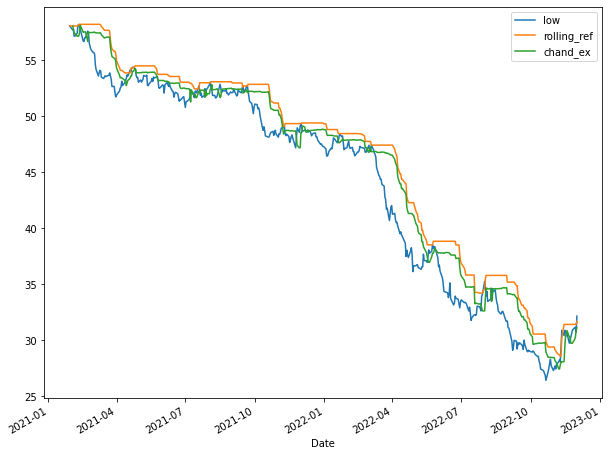

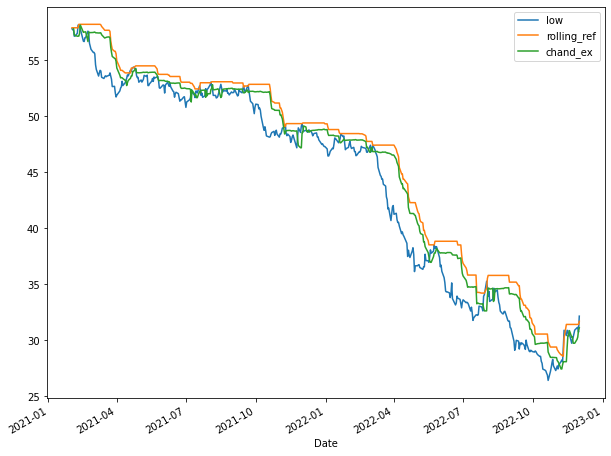

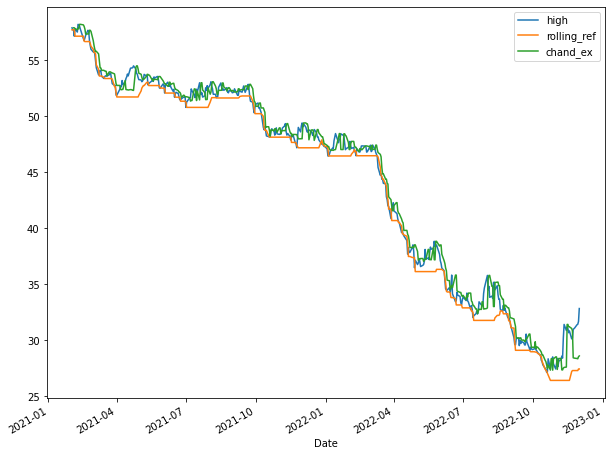

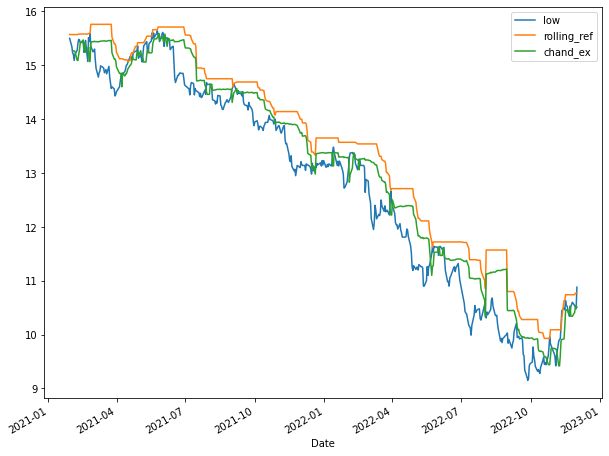

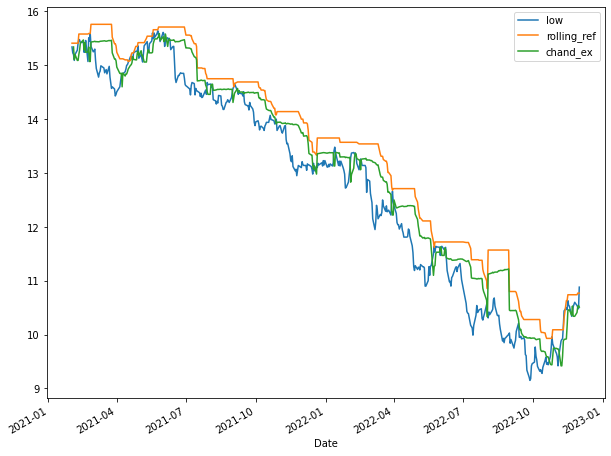

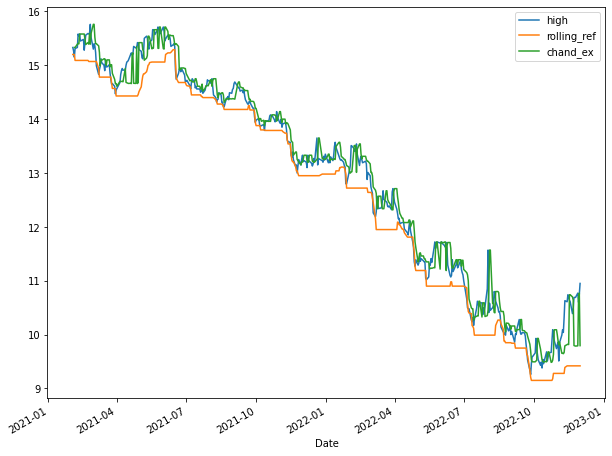

In [8]:

from workflow.sectorRotationTraderWorkflow import run_forex_worflow
past_perf_df, latest_trades_df, pred_df=run_forex_worflow(pred_date=None, use_dukas=False)

In [8]:
!ls download

eurusd-h4-bid-2022-11-11-2022-11-25.csv


count    84.000000
mean      1.032108
std       0.005117
min       1.016300
25%       1.029965
50%       1.032350
75%       1.035380
max       1.041500
Name: Low, dtype: float64

In [9]:
from datalib.heatmapUtil import get_rel_nday_ma_zscore_heatmap
from workflow.sectorRotationTraderWorkflow import batch_sector_rotation_learning
from backtest.chandelierExitBacktester import chandelierExitBacktester, backtest_between, get_long_max_drawdown_details
from datalib.commonUtil import commonUtil as cu
import pandas as pd
import pandas_ta as ta
ew_sector_etf_list=['RCD', 'RYH', 'RYT', 'RGI', 'RHS', 'RTM', 'RYF', 'RSP', 'RYE', 'RYU', 'EQAL', 'EWRE', 'QQEW', 'TLT', 'EMLC', 'EEM' ]
feat_cols=['TLT', 'EQAL', 'RYF', 'EMLC', 'EWRE', 'RTM', 'RYE', 'EEM', 'RYT', 'RYU', 'RHS']  
tlist=ew_sector_etf_list.copy()
tlist.append('TMF')
rank_df=get_rel_nday_ma_zscore_heatmap(tlist, list_tag='rank_sector_etf', use_rank=True, zdays=0, pred_date='20210901')

['RCD', 'RYH', 'RYT', 'RGI', 'RHS', 'RTM', 'RYF', 'RSP', 'RYE', 'RYU', 'EQAL', 'EWRE', 'QQEW', 'TLT', 'EMLC', 'EEM', 'TMF']


,RCD,RYH,RYT,RGI,RHS,RTM,RYF,RSP,RYE,RYU,EQAL,EWRE,QQEW,TLT,EMLC,EEM,TMF
2021-08-26,7.0,5.0,11.0,14.0,2.0,13.0,15.0,9.0,17.0,3.0,8.0,6.0,10.0,4.0,12.0,16.0,1.0
2021-08-27,7.0,3.0,12.0,11.0,2.0,15.0,16.0,8.0,17.0,1.0,14.0,10.0,5.0,4.0,9.0,13.0,6.0
2021-08-30,3.0,8.0,15.0,6.0,4.0,7.0,1.0,5.0,13.0,2.0,12.0,16.0,9.0,11.0,14.0,10.0,17.0
2021-08-31,1.0,13.0,11.0,6.0,14.0,7.0,2.0,8.0,10.0,5.0,9.0,16.0,12.0,4.0,15.0,17.0,3.0
2021-09-01,8.0,12.0,6.0,3.0,14.0,5.0,2.0,9.0,1.0,15.0,11.0,16.0,10.0,7.0,13.0,17.0,4.0


heat_df.columns: DatetimeIndex(['2021-02-04', '2021-02-11', '2021-02-19', '2021-02-26',
               '2021-03-05', '2021-03-12', '2021-03-19', '2021-03-26',
               '2021-04-05', '2021-04-12', '2021-04-19', '2021-04-26',
               '2021-05-03', '2021-05-10', '2021-05-17', '2021-05-24',
               '2021-06-01', '2021-06-08', '2021-06-15', '2021-06-22',
               '2021-06-29', '2021-07-07', '2021-07-14', '2021-07-21',
               '2021-07-28', '2021-08-04', '2021-08-11', '2021-08-18',
               '2021-08-25', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


,0204,0211,0219,0226,0305,0312,0319,0326,0405,0412,0419,0426,0503,0510,0517,0524,0601,0608,0615,0622,0629,0707,0714,0721,0728,0804,0811,0818,0825,0901
EEM,90,170,80,10,50,50,150,50,100,20,110,110,20,50,70,40,150,10,80,20,140,20,170,50,30,160,80,60,150,170
EWRE,80,150,100,70,90,170,20,120,70,70,150,60,80,130,90,140,160,160,30,60,40,130,160,90,90,70,40,100,50,160
RYU,70,20,60,20,160,120,100,60,60,60,140,20,140,140,10,60,30,40,160,10,20,150,130,20,140,110,90,140,40,150
RHS,50,10,40,40,150,80,140,90,20,90,130,10,160,160,50,80,60,20,70,40,100,100,90,40,10,20,130,120,30,140
EMLC,30,90,50,100,40,30,160,30,40,30,120,50,40,120,20,30,80,80,60,50,70,50,150,60,100,100,70,130,70,130
RYH,40,100,30,120,70,60,170,70,50,150,160,70,70,80,30,90,20,100,150,140,130,140,40,80,130,130,20,150,60,120
EQAL,140,130,110,80,110,160,50,80,90,110,90,120,50,70,130,130,130,120,90,90,80,60,20,120,120,50,100,80,120,110
QQEW,100,140,70,60,30,90,60,40,160,100,10,130,30,30,60,150,70,130,110,150,150,80,100,110,70,120,50,110,100,100
RSP,130,110,120,90,120,130,70,110,120,120,100,90,100,90,110,100,90,70,100,100,90,90,50,100,80,80,110,90,90,90
RCD,150,30,150,150,80,150,110,100,150,140,50,100,120,60,140,20,100,140,50,160,110,40,30,170,40,40,120,30,160,80


['eurcad', 'gbpusd', 'nzdusd', 'audusd', 'audnzd', 'usdjpy', 'usdchf', 'usdcad', 'usdsgd', 'eurchf', 'eurusd', 'eurusd', 'usdjpy']


,eurcad,gbpusd,nzdusd,audusd,audnzd,usdjpy,usdchf,usdcad,usdsgd,eurchf,eurusd
2022-11-24 07:00:00,7.0,10.0,9.0,11.0,6.0,1.0,2.0,3.0,4.0,5.0,8.0
2022-11-24 11:00:00,7.0,8.0,9.0,11.0,6.0,1.0,2.0,4.0,3.0,5.0,10.0
2022-11-24 15:00:00,9.0,6.0,2.0,8.0,11.0,1.0,5.0,4.0,3.0,10.0,7.0
2022-11-24 19:00:00,2.0,11.0,9.0,8.0,4.0,1.0,10.0,5.0,6.0,7.0,3.0
2022-11-24 23:00:00,2.0,11.0,8.0,9.0,6.0,1.0,10.0,4.0,5.0,7.0,3.0


heat_df.columns: DatetimeIndex(['2022-11-04 23:00:00', '2022-11-05 23:00:00',
               '2022-11-06 23:00:00', '2022-11-07 23:00:00',
               '2022-11-08 23:00:00', '2022-11-09 23:00:00',
               '2022-11-10 23:00:00', '2022-11-11 23:00:00',
               '2022-11-12 23:00:00', '2022-11-13 23:00:00',
               '2022-11-14 23:00:00', '2022-11-15 23:00:00',
               '2022-11-16 23:00:00', '2022-11-17 23:00:00',
               '2022-11-18 23:00:00', '2022-11-19 23:00:00',
               '2022-11-20 23:00:00', '2022-11-21 23:00:00',
               '2022-11-22 23:00:00', '2022-11-23 23:00:00',
               '2022-11-24 23:00:00'],
              dtype='datetime64[ns]', freq=None)
exception converting heatmap value to int  Cannot convert non-finite values (NA or inf) to integer


/Users/jackylee/miniforge3/lib/python3.9/site-packages/pandas/io/formats/style.py:3554: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/Users/jackylee/miniforge3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124
gbpusd,nan,105,50,110,90,10,100,70,65,60,10,110,70,20,90,65,65,30,90,110,110
usdchf,nan,55,50,10,30,60,20,10,10,10,30,70,50,110,40,110,20,90,10,20,100
audusd,nan,10,50,100,110,20,110,90,65,60,100,100,10,10,20,65,65,10,100,100,90
nzdusd,nan,55,50,80,100,30,90,110,65,110,90,90,40,30,80,65,65,20,110,90,80
eurchf,nan,55,50,50,70,40,50,30,65,60,70,80,90,90,30,65,65,60,30,30,70
audnzd,nan,55,50,60,60,70,70,60,65,60,50,60,20,60,10,15,65,50,50,60,60
usdsgd,nan,55,105,30,40,90,40,40,65,60,20,20,60,80,70,65,65,80,60,40,50
usdcad,nan,55,50,40,20,100,30,50,65,60,40,30,100,70,110,65,110,100,40,50,40
eurusd,nan,105,105,90,80,50,80,100,65,60,60,40,80,40,50,65,65,40,80,80,30
eurcad,nan,55,50,70,50,80,60,80,65,60,80,50,110,50,100,65,65,70,70,70,20


,eurcad,gbpusd,nzdusd,audusd,audnzd,usdjpy,usdchf,usdcad,usdsgd,eurchf,eurusd
2022-11-24 07:00:00,7.0,10.0,9.0,11.0,6.0,1.0,2.0,3.0,4.0,5.0,8.0
2022-11-24 11:00:00,7.0,8.0,9.0,11.0,6.0,1.0,2.0,4.0,3.0,5.0,10.0
2022-11-24 15:00:00,9.0,6.0,2.0,8.0,11.0,1.0,5.0,4.0,3.0,10.0,7.0
2022-11-24 19:00:00,2.0,11.0,9.0,8.0,4.0,1.0,10.0,5.0,6.0,7.0,3.0
2022-11-24 23:00:00,2.0,11.0,8.0,9.0,6.0,1.0,10.0,4.0,5.0,7.0,3.0


latest rpdf: timestamp    1.669838e+12
Open         1.767647e+03
High         1.773348e+03
Low          1.766098e+03
Close        1.773248e+03
Volume       1.100000e+01
Name: 2022-12-01 07:00:00, dtype: float64 
now in test getting in batch sector eurusd


count    162.000000
mean       0.104938
std        0.345477
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lbm_7_bigmove, dtype: float64

count    162.000000
mean       0.172840
std        0.480427
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_eurcad', 'i_eurcad_d', 'i_eurcad_d2', 'i_gbpusd', 'i_gbpusd_d', 'i_gbpusd_d2', 'i_nzdusd', 'i_nzdusd_d', 'i_nzdusd_d2', 'i_audusd', 'i_audusd_d', 'i_audusd_d2', 'i_audnzd', 'i_audnzd_d', 'i_audnzd_d2', 'i_usdjpy', 'i_usdjpy_d', 'i_usdjpy_d2', 'i_usdchf', 'i_usdchf_d', 'i_usdchf_d2', 'i_usdcad', 'i_usdcad_d', 'i_usdcad_d2', 'i_usdsgd', 'i_usdsgd_d', 'i_usdsgd_d2', 'i_eurchf', 'i_eurchf_d', 'i_eurchf_d2', 'i_eurusd', 'i_eurusd_d', 'i_eurusd_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:xauusd
long eurusd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-11-24 19:00:00  0.181818   -0.636364    -0.818182       1.0    0.454545   
2022-11-24 23:00:00  0.181818   

count    24.000000
mean      0.291667
std       0.464306
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: _lb_7_spikeup, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_eurcad': 96.0, 'i_gbpusd': 104.0, 'i_gbpusd_d': 50.0, 'i_nzdusd': 79.0, 'i_audusd': 21.0, 'i_audnzd': 21.0, 'i_usdjpy': 125.0, 'i_usdjpy_d': 100.0, 'i_usdchf': 100.0, 'i_usdcad': 25.0, 'i_usdsgd': 47.0, 'i_eurchf': 100.0, 'i_eurusd': 53.0}
unique_y: ([0, 1], (100,), (24,), (24, 33))
pred 1 is [0 

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_eurchf,0.223138
1,i_usdjpy,0.092387
2,i_usdchf,0.091618
3,i_usdjpy_d,0.086259
4,i_gbpusd_d,0.083873


 pred_flag:
long eurusd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-11-24 19:00:00  0.181818   -0.636364    -0.818182       1.0    0.454545   
2022-11-24 23:00:00  0.181818    0.000000     0.636364       1.0    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-11-24 19:00:00     0.636364  0.818182    0.636364     1.272727  0.727273   
2022-11-24 23:00:00    -0.454545  0.727273   -0.090909    -0.727273  0.818182   

                     ...  Volume   _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-11-24 19:00:00  ...      11  0.000211              0              0   
2022-11-24 23:00:00  ...      10  0.000211              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-11-24 19:00:00    1.03546     1.04291                0              0   
2022-11-24 23:00:00    1.03546     1.04291                0              0   

              

count    24.000000
mean      0.166667
std       0.380693
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: _lb_7_bigrise, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_eurcad': 98.0, 'i_gbpusd_d': 50.0, 'i_audnzd': 52.0, 'i_audnzd_d2': 52.0, 'i_usdchf': 100.0, 'i_usdsgd_d2': 100.0, 'i_eurchf': 100.0}
unique_y: ([0, 1], (100,), (24,), (24, 33))
pred 1 is [0 0 0 1 0 1 1 0 0 0] 24 
pred fixed is [0, 0, 0, 1, 0, 1, 1, 0, 0, 0] 24 
test_classes_names: names, dict, i

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_eurchf,0.563338
1,i_usdchf,0.121700
2,i_usdsgd_d2,0.121697
3,i_gbpusd_d,0.110037
4,i_eurcad,0.063546


 pred_flag:
long eurusd at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-11-24 19:00:00  0.181818   -0.636364    -0.818182       1.0    0.454545   
2022-11-24 23:00:00  0.181818    0.000000     0.636364       1.0    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-11-24 19:00:00     0.636364  0.818182    0.636364     1.272727  0.727273   
2022-11-24 23:00:00    -0.454545  0.727273   -0.090909    -0.727273  0.818182   

                     ...  Volume   _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-11-24 19:00:00  ...      11  0.000211              0              0   
2022-11-24 23:00:00  ...      10  0.000211              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-11-24 19:00:00    1.03546     1.04291                0              0   
2022-11-24 23:00:00    1.03546     1.04291                0              0   

              

count    24.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
Name: _lb_7_bigdrop, dtype: float64

loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_audnzd': 50.0, 'i_eurusd_d': 50.0}
unique_y: ([0, 1], (100,), (24,), (24, 33))
pred 1 is [0 0 0 0 0 0 0 0 0 0] 24 
pred fixed is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 24 
test_classes_names: names, dict, ilist (['True', 'False'], {-1: 'drop', 0: 'drop', 1: 'sideway', 2: 'rise', 3: 'rise'}, [0, 1], [0])


/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

,name,imp_val
0,i_audnzd,0.500002
1,i_eurusd_d,0.499998
2,i_eurcad,0.000000
3,i_usdsgd,0.000000
4,i_usdchf_d,0.000000


 pred_flag:
eurusd results:
dict_keys(['catboost._lb_7_spikeup.long', 'catboost._lb_7_bigrise.long'])


,eurusd.catboost._lb_7_spikeup.long,eurusd.catboost._lb_7_bigrise.long
trade_type,long,long
rticker,xauusd,xauusd
mean_max_drawdown,-0.005674,-0.006477
mean_drawdown,-0.003309,-0.005167
median_drawdown,-0.003309,-0.005167
mean_drawdown_day,0 days 03:00:00,0 days 06:40:00
median_drawdown_day,0 days 03:00:00,0 days 06:40:00
mean_peakprofit,0.003904,0.003398
median_peakprofit,0.003904,0.003398
mean_peakprofit_day,0 days 06:40:00,0 days 09:20:00


now in test getting in batch sector usdjpy


count    162.000000
mean      -0.061728
std        0.412406
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lbm_7_bigmove, dtype: float64

count    162.000000
mean      -0.123457
std        0.565745
min       -1.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_eurcad', 'i_eurcad_d', 'i_eurcad_d2', 'i_gbpusd', 'i_gbpusd_d', 'i_gbpusd_d2', 'i_nzdusd', 'i_nzdusd_d', 'i_nzdusd_d2', 'i_audusd', 'i_audusd_d', 'i_audusd_d2', 'i_audnzd', 'i_audnzd_d', 'i_audnzd_d2', 'i_usdjpy', 'i_usdjpy_d', 'i_usdjpy_d2', 'i_usdchf', 'i_usdchf_d', 'i_usdchf_d2', 'i_usdcad', 'i_usdcad_d', 'i_usdcad_d2', 'i_usdsgd', 'i_usdsgd_d', 'i_usdsgd_d2', 'i_eurchf', 'i_eurchf_d', 'i_eurchf_d2', 'i_eurusd', 'i_eurusd_d', 'i_eurusd_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:xauusd
long usdjpy at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-11-24 19:00:00  0.181818   -0.636364    -0.818182       1.0    0.454545   
2022-11-24 23:00:00  0.181818   

count    24.000000
mean      0.125000
std       0.337832
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: _lb_7_spikeup, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_eurcad': 100.0, 'i_eurcad_d': 50.0, 'i_gbpusd_d': 66.0, 'i_nzdusd': 23.0, 'i_audusd_d': 100.0, 'i_audusd_d2': 100.0, 'i_usdjpy': 100.0, 'i_usdchf': 72.0, 'i_usdcad_d': 16.0, 'i_usdsgd': 23.0, 'i_usdsgd_d2': 50.0, 'i_eurchf': 100.0, 'i_eurchf_d2': 100.0}
unique_y: ([0, 1], (100,), (24,), (24, 33))

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_eurchf,0.341853
1,i_usdjpy,0.169239
2,i_eurchf_d2,0.144762
3,i_audusd_d2,0.133153
4,i_usdsgd_d2,0.064504


 pred_flag:
long usdjpy at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-11-24 19:00:00  0.181818   -0.636364    -0.818182       1.0    0.454545   
2022-11-24 23:00:00  0.181818    0.000000     0.636364       1.0    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-11-24 19:00:00     0.636364  0.818182    0.636364     1.272727  0.727273   
2022-11-24 23:00:00    -0.454545  0.727273   -0.090909    -0.727273  0.818182   

                     ...  Volume   _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-11-24 19:00:00  ...      12  0.006514              0              0   
2022-11-24 23:00:00  ...      14  0.004821              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-11-24 19:00:00    138.083     139.594                0              0   
2022-11-24 23:00:00    138.310     139.594                0              0   

              

count    24.000000
mean      0.125000
std       0.337832
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: _lb_7_bigrise, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_audnzd_d2': 150.0, 'i_usdjpy_d': 100.0, 'i_usdchf': 50.0, 'i_eurchf': 50.0, 'i_eurchf_d2': 50.0}
unique_y: ([0, 1], (100,), (24,), (24, 33))
pred 1 is [0 0 0 0 0 0 0 0 0 0] 24 
pred fixed is [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 24 
test_classes_names: names, dict, ilist (['drop', 'sideway'], {-1: 'drop

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackylee/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackylee/miniforge3/lib/python3.9/site-packag

,name,imp_val
0,i_usdjpy_d,0.320100
1,i_audnzd_d2,0.180374
2,i_eurchf,0.176775
3,i_eurchf_d2,0.176774
4,i_usdchf,0.145977


 pred_flag:
long usdjpy at cat boost:                     i_eurcad  i_eurcad_d  i_eurcad_d2  i_gbpusd  i_gbpusd_d  \
2022-11-24 19:00:00  0.181818   -0.636364    -0.818182       1.0    0.454545   
2022-11-24 23:00:00  0.181818    0.000000     0.636364       1.0    0.000000   

                     i_gbpusd_d2  i_nzdusd  i_nzdusd_d  i_nzdusd_d2  i_audusd  \
2022-11-24 19:00:00     0.636364  0.818182    0.636364     1.272727  0.727273   
2022-11-24 23:00:00    -0.454545  0.727273   -0.090909    -0.727273  0.818182   

                     ...  Volume   _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  \
2022-11-24 19:00:00  ...      12  0.006514              0              0   
2022-11-24 23:00:00  ...      14  0.004821              0              0   

                     _n_7d_low  _n_7d_high  _lb_7_spikedown  _lb_7_spikeup  \
2022-11-24 19:00:00    138.083     139.594                0              0   
2022-11-24 23:00:00    138.310     139.594                0              0   

              

count    24.000000
mean      0.291667
std       0.464306
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: _lb_7_bigdrop, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_eurcad': 99.0, 'i_gbpusd_d': 50.0, 'i_audnzd': 51.0, 'i_audnzd_d2': 51.0, 'i_usdchf': 100.0, 'i_usdsgd_d2': 100.0, 'i_eurchf': 100.0}
unique_y: ([0, 1], (100,), (24,), (24, 33))
pred 1 is [0 0 0 1 0 1 1 0 0 0] 24 
pred fixed is [0, 0, 0, 1, 0, 1, 1, 0, 0, 0] 24 
test_classes_names: names, dict, i

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_eurchf,0.537248
1,i_usdchf,0.125603
2,i_usdsgd_d2,0.125601
3,i_gbpusd_d,0.121379
4,i_eurcad,0.069150


 pred_flag:
usdjpy results:
dict_keys(['catboost._lb_7_spikeup.long', 'catboost._lb_7_bigdrop.short'])


,usdjpy.catboost._lb_7_spikeup.long,usdjpy.catboost._lb_7_bigdrop.short
trade_type,long,short
rticker,xauusd,xauusd
mean_max_drawdown,-0.005613,-0.01192
mean_drawdown,-0.002252,-0.007444
median_drawdown,-0.002252,-0.007444
mean_drawdown_day,0 days 07:00:00,0 days 10:40:00
median_drawdown_day,0 days 07:00:00,0 days 10:40:00
mean_peakprofit,0.00353,0.008323
median_peakprofit,0.00353,0.008323
mean_peakprofit_day,0 days 01:00:00,0 days 13:20:00


ValueError: too many values to unpack (expected 2)

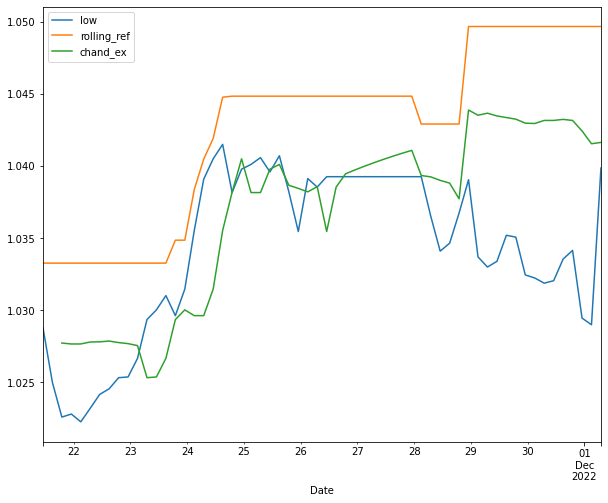

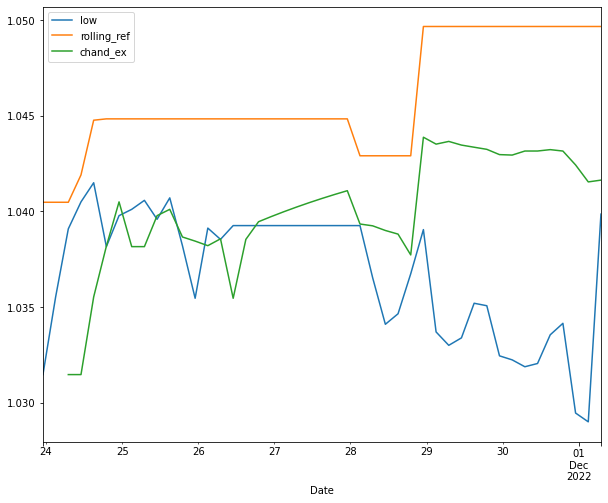

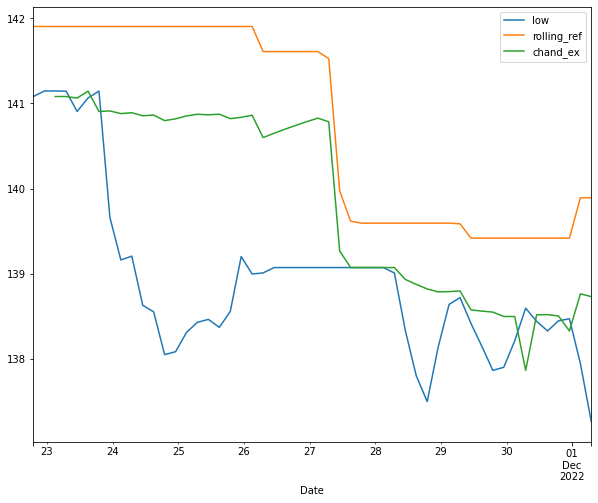

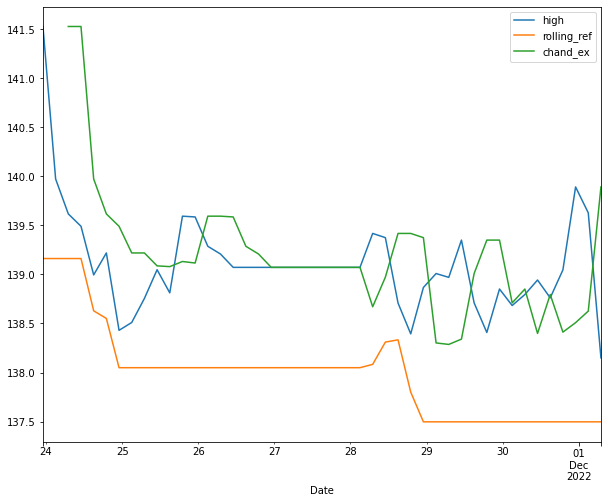

In [10]:
#sample test case and output
from workflow.sectorRotationTraderWorkflow import  run_forex_worflow
all_perf_table, all_trades_df=run_forex_worflow(pred_date='20221124', use_dukas=True)

assert(len(all_perf_table)>0)
assert(len(all_trades_df)>0)
assert(all_perf_table.exposure_adjusted_annualized_gain.mean()>0)

['RYT', 'SPY', 'RSP', 'RYU', 'RYH', 'RHS', 'EQAL', 'RYE', 'EWRE', 'TLT', 'EMLC', 'RGI', 'RCD', 'QQEW', 'RYF', 'EEM', 'RTM', 'TMF']


,RYT,SPY,RSP,RYU,RYH,RHS,EQAL,RYE,EWRE,TLT,EMLC,RGI,RCD,QQEW,RYF,EEM,RTM,TMF
2022-12-01,14.0,10.0,8.0,4.0,12.0,2.0,9.0,1.0,5.0,17.0,11.0,6.0,13.0,16.0,3.0,15.0,7.0,18.0
2022-12-02,7.0,NaN,5.0,2.0,13.0,6.0,8.0,1.0,4.0,16.0,9.0,10.0,11.0,12.0,3.0,14.0,15.0,NaN
2022-12-05,5.0,NaN,6.0,11.0,12.0,14.0,4.0,1.0,3.0,16.0,13.0,9.0,8.0,7.0,2.0,15.0,10.0,NaN
2022-12-06,2.0,NaN,8.0,14.0,11.0,12.0,4.0,1.0,7.0,16.0,15.0,9.0,5.0,3.0,6.0,13.0,10.0,NaN
2022-12-07,2.0,NaN,7.0,12.0,13.0,14.0,4.0,1.0,10.0,16.0,15.0,8.0,3.0,5.0,6.0,11.0,9.0,NaN


heat_df.columns: DatetimeIndex(['2022-05-11', '2022-05-18', '2022-05-25', '2022-06-02',
               '2022-06-09', '2022-06-16', '2022-06-24', '2022-07-01',
               '2022-07-11', '2022-07-18', '2022-07-25', '2022-08-01',
               '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29',
               '2022-09-06', '2022-09-13', '2022-09-20', '2022-09-27',
               '2022-10-04', '2022-10-11', '2022-10-18', '2022-10-25',
               '2022-11-01', '2022-11-08', '2022-11-15', '2022-11-22',
               '2022-11-30', '2022-12-07'],
              dtype='datetime64[ns]', freq=None)


,0511,0518,0525,0602,0609,0616,0624,0701,0711,0718,0725,0801,0808,0815,0822,0829,0906,0913,0920,0927,1004,1011,1018,1025,1101,1108,1115,1122,1130,1207
TLT,170,170,100,20,180,170,20,160,160,40,150,130,60,20,140,160,20,170,130,30,10,140,20,20,50,20,120,50,20,160
EMLC,140,160,50,70,150,160,40,100,30,100,120,70,140,30,150,150,150,160,170,130,40,170,30,30,10,90,60,30,60,150
RHS,150,10,160,30,130,150,100,130,130,30,110,80,20,60,170,120,50,60,180,90,30,180,50,70,40,60,10,160,40,140
RYH,100,110,20,50,110,130,150,140,150,50,100,20,80,70,120,50,140,90,40,150,90,110,80,150,140,50,50,90,120,130
SPY,90,40,90,140,80,100,140,70,100,90,50,110,50,120,100,40,100,40,150,140,80,50,110,100,30,100,100,60,130,130
RYU,160,150,130,40,20,70,130,170,170,20,160,140,70,150,160,140,170,140,120,40,50,130,180,60,170,30,20,150,80,120
EEM,130,130,10,160,140,140,50,30,10,120,40,10,130,50,130,130,30,150,160,110,70,40,60,10,130,170,170,10,180,110
EWRE,50,70,140,60,10,120,120,150,60,70,130,60,180,80,60,80,180,100,20,50,60,160,160,160,120,40,40,130,150,100
RTM,110,100,60,130,40,30,60,40,80,60,140,50,100,100,110,100,70,70,50,100,170,120,150,90,20,180,80,170,100,90
RGI,70,50,70,120,100,60,70,120,110,80,80,160,120,130,70,20,160,50,100,120,140,150,170,110,150,140,70,40,50,80


latest rpdf: Open               226.360001
High               228.179993
Low                226.320007
Close              226.710007
Volume          219600.000000
Dividends            0.000000
Stock Splits         0.000000
Name: 2022-12-07 00:00:00, dtype: float64 
now in test getting in batch sector TMF


count    3433.000000
mean        0.001748
std         0.344787
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigmove, dtype: float64

count    3433.000000
mean        0.001456
std         0.503772
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_TLT', 'i_TLT_d', 'i_TLT_d2', 'i_EQAL', 'i_EQAL_d', 'i_EQAL_d2', 'i_RYF', 'i_RYF_d', 'i_RYF_d2', 'i_EMLC', 'i_EMLC_d', 'i_EMLC_d2', 'i_EWRE', 'i_EWRE_d', 'i_EWRE_d2', 'i_RTM', 'i_RTM_d', 'i_RTM_d2', 'i_RYE', 'i_RYE_d', 'i_RYE_d2', 'i_EEM', 'i_EEM_d', 'i_EEM_d2', 'i_RYT', 'i_RYT_d', 'i_RYT_d2', 'i_RYU', 'i_RYU_d', 'i_RYU_d2', 'i_RHS', 'i_RHS_d', 'i_RHS_d2', 'i_TMF', 'i_TMF_d', 'i_TMF_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:IWV


/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


long TMF at cat boost:               i_TLT   i_TLT_d  i_TLT_d2    i_EQAL  i_EQAL_d  i_EQAL_d2  \
2022-11-30  0.111111 -0.388889  0.055556  0.611111  0.222222   0.277778   
2022-12-01  0.944444  0.833333  1.222222  0.500000 -0.111111  -0.333333   

               i_RYF   i_RYF_d  i_RYF_d2    i_EMLC  ...  Stock Splits  \
2022-11-30  0.388889 -0.333333 -0.722222  0.333333  ...           0.0   
2022-12-01  0.166667 -0.222222  0.111111  0.611111  ...           0.0   

            _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  _n_7d_low  _n_7d_high  \
2022-11-30      NaN              0              0        NaN         NaN   
2022-12-01      NaN              0              0        NaN         NaN   

            _lb_7_spikedown  _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2022-11-30                0              0               0                0  
2022-12-01                0              0               0                0  

[2 rows x 52 columns]
target_col:,_lb_7_spikeup,                i_TL

count    450.000000
mean       0.135556
std        0.342697
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_spikeup, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_TLT': 11.0, 'i_TLT_d': 129.0, 'i_TLT_d2': 54.0, 'i_EQAL_d': 38.0, 'i_EQAL_d2': 133.0, 'i_RYF': 100.0, 'i_EMLC': 170.0, 'i_EMLC_d2': 68.0, 'i_EWRE': 138.0, 'i_EWRE_d2': 71.0, 'i_RTM': 100.0, 'i_RTM_d2': 50.0, 'i_RYE': 105.0, 'i_RYE_d': 50.0, 'i_RYE_d2': 62.0, 'i_EEM_d': 100.0, 'i_RYT_d': 138.0, 'i

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_EWRE,0.099655
1,i_RYU,0.080046
2,i_RYF,0.069886
3,i_RYE,0.064398
4,i_TLT_d2,0.057094


 pred_flag:
long TMF at cat boost:               i_TLT   i_TLT_d  i_TLT_d2    i_EQAL  i_EQAL_d  i_EQAL_d2  \
2022-11-30  0.111111 -0.388889  0.055556  0.611111  0.222222   0.277778   
2022-12-01  0.944444  0.833333  1.222222  0.500000 -0.111111  -0.333333   

               i_RYF   i_RYF_d  i_RYF_d2    i_EMLC  ...  Stock Splits  \
2022-11-30  0.388889 -0.333333 -0.722222  0.333333  ...           0.0   
2022-12-01  0.166667 -0.222222  0.111111  0.611111  ...           0.0   

            _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  _n_7d_low  _n_7d_high  \
2022-11-30      NaN              0              0        NaN         NaN   
2022-12-01      NaN              0              0        NaN         NaN   

            _lb_7_spikedown  _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2022-11-30                0              0               0                0  
2022-12-01                0              0               0                0  

[2 rows x 52 columns]
target_col:,_lb_7_bigrise,        

count    450.000000
mean       0.048889
std        0.215876
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigrise, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_TLT': 18.0, 'i_TLT_d': 44.0, 'i_TLT_d2': 225.0, 'i_EQAL_d': 113.0, 'i_EQAL_d2': 31.0, 'i_RYF': 100.0, 'i_RYF_d2': 69.0, 'i_EMLC': 57.0, 'i_EWRE': 38.0, 'i_RTM_d': 69.0, 'i_RTM_d2': 204.0, 'i_RYE': 43.0, 'i_EEM': 247.0, 'i_EEM_d': 44.0, 'i_EEM_d2': 13.0, 'i_RYT': 34.0, 'i_RYT_d2': 38.0, 'i_RYU': 8

,name,imp_val
0,i_RYF,0.073298
1,i_RYE,0.067226
2,i_RYT_d2,0.059812
3,i_RHS,0.055181
4,i_RYT,0.054685


 pred_flag:
long TMF at cat boost:               i_TLT   i_TLT_d  i_TLT_d2    i_EQAL  i_EQAL_d  i_EQAL_d2  \
2022-11-30  0.111111 -0.388889  0.055556  0.611111  0.222222   0.277778   
2022-12-01  0.944444  0.833333  1.222222  0.500000 -0.111111  -0.333333   

               i_RYF   i_RYF_d  i_RYF_d2    i_EMLC  ...  Stock Splits  \
2022-11-30  0.388889 -0.333333 -0.722222  0.333333  ...           0.0   
2022-12-01  0.166667 -0.222222  0.111111  0.611111  ...           0.0   

            _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  _n_7d_low  _n_7d_high  \
2022-11-30      NaN              0              0        NaN         NaN   
2022-12-01      NaN              0              0        NaN         NaN   

            _lb_7_spikedown  _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2022-11-30                0              0               0                0  
2022-12-01                0              0               0                0  

[2 rows x 52 columns]
target_col:,_lb_7_bigdrop,        

count    450.000000
mean       0.117778
std        0.322704
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigdrop, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_TLT': 160.0, 'i_TLT_d': 44.0, 'i_TLT_d2': 100.0, 'i_EQAL': 80.0, 'i_EQAL_d': 20.0, 'i_EQAL_d2': 113.0, 'i_RYF': 65.0, 'i_RYF_d': 87.0, 'i_RYF_d2': 13.0, 'i_EMLC': 22.0, 'i_EMLC_d': 13.0, 'i_EWRE': 73.0, 'i_EWRE_d': 100.0, 'i_RTM': 30.0, 'i_RYE': 83.0, 'i_EEM': 87.0, 'i_EEM_d': 100.0, 'i_EEM_d2': 

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackylee/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jackylee/miniforge3/lib/python3.9/site-packag

,name,imp_val
0,i_EWRE_d,0.142369
1,i_EQAL_d2,0.080879
2,i_RYF_d2,0.078252
3,i_RHS,0.065019
4,i_EEM,0.049165


 pred_flag:
TMF results:
dict_keys(['catboost._lb_7_spikeup.long', 'catboost._lb_7_bigrise.long'])


,TMF.catboost._lb_7_spikeup.long,TMF.catboost._lb_7_bigrise.long
trade_type,long,long
rticker,IWV,IWV
mean_max_drawdown,-0.061169,-0.090626
mean_drawdown,-0.036642,-0.041319
median_drawdown,-0.036642,-0.041319
mean_drawdown_day,1 days 07:53:55.443037974,4 days 08:00:00
median_drawdown_day,1 days 07:53:55.443037974,4 days 08:00:00
mean_peakprofit,0.035181,0.054238
median_peakprofit,0.035181,0.054238
mean_peakprofit_day,1 days 05:46:19.746835443,2 days 08:00:00


all_perf_table_bull:


,trade_type,rticker,mean_max_drawdown,mean_drawdown,median_drawdown,mean_drawdown_day,median_drawdown_day,mean_peakprofit,median_peakprofit,mean_peakprofit_day,...,lose_trade_median_day_in_trade,start_entry,end_exit,duration,total_day_in_trade,exposure_portion,annualized_gain,exposure_adjusted_annualized_gain,exposure_adjusted_annualized_gain_per_mean_drawdown,model_best_iteration
TMF.catboost._lb_7_spikeup.long,long,IWV,-0.061169,-0.036642,-0.036642,1 days 07:53:55.443037974,1 days 07:53:55.443037974,0.035181,0.035181,1 days 05:46:19.746835443,...,1.0,2021-03-09,2022-11-30,631.5,145,0.229612,-0.230357,-1.003246,-27.379864,99
TMF.catboost._lb_7_bigrise.long,long,IWV,-0.090626,-0.041319,-0.041319,4 days 08:00:00,4 days 08:00:00,0.054238,0.054238,2 days 08:00:00,...,1.0,2021-04-30,2022-01-03,248.5,12,0.04829,-0.086229,-1.785668,-43.217143,99


(                                trade_type rticker mean_max_drawdown  \
 TMF.catboost._lb_7_spikeup.long       long     IWV         -0.061169   
 TMF.catboost._lb_7_bigrise.long       long     IWV         -0.090626   
 
                                 mean_drawdown median_drawdown  \
 TMF.catboost._lb_7_spikeup.long     -0.036642       -0.036642   
 TMF.catboost._lb_7_bigrise.long     -0.041319       -0.041319   
 
                                         mean_drawdown_day  \
 TMF.catboost._lb_7_spikeup.long 1 days 07:53:55.443037974   
 TMF.catboost._lb_7_bigrise.long           4 days 08:00:00   
 
                                       median_drawdown_day mean_peakprofit  \
 TMF.catboost._lb_7_spikeup.long 1 days 07:53:55.443037974        0.035181   
 TMF.catboost._lb_7_bigrise.long           4 days 08:00:00        0.054238   
 
                                 median_peakprofit       mean_peakprofit_day  \
 TMF.catboost._lb_7_spikeup.long          0.035181 1 days 05:46:19.74683544

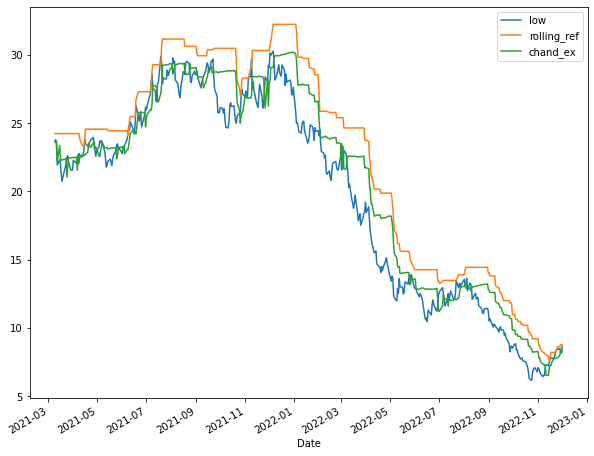

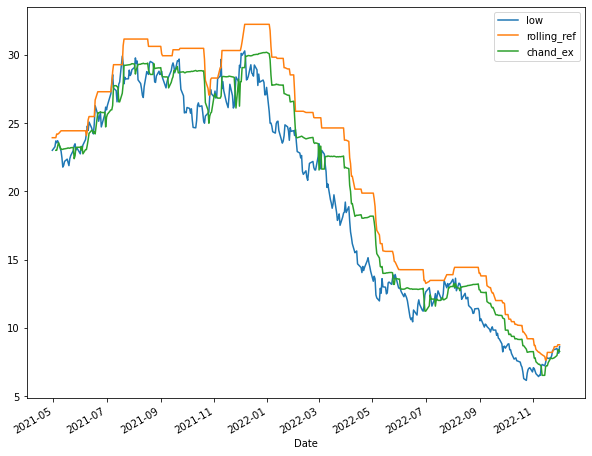

In [1]:
from workflow.sectorRotationTraderWorkflow import run_etf_test
run_etf_test(th=0.10,def_pct_stop=0.1, mkt='usa', focus_tlist=['TMF'], rticker='IWV')

['RCD', 'RYH', 'RYT', 'RGI', 'RHS', 'RTM', 'RYF', 'RSP', 'RYE', 'RYU', 'EQAL', 'EWRE', 'QQEW', 'TLT', 'EMLC', 'EEM', 'TMF']


,RCD,RYH,RYT,RGI,RHS,RTM,RYF,RSP,RYE,RYU,EQAL,EWRE,QQEW,TLT,EMLC,EEM,TMF
2021-08-26,7.0,5.0,11.0,14.0,2.0,13.0,15.0,9.0,17.0,3.0,8.0,6.0,10.0,4.0,12.0,16.0,1.0
2021-08-27,7.0,3.0,12.0,11.0,2.0,15.0,16.0,8.0,17.0,1.0,14.0,10.0,5.0,4.0,9.0,13.0,6.0
2021-08-30,3.0,8.0,15.0,6.0,4.0,7.0,1.0,5.0,13.0,2.0,12.0,16.0,9.0,11.0,14.0,10.0,17.0
2021-08-31,1.0,13.0,11.0,6.0,14.0,7.0,2.0,8.0,10.0,5.0,9.0,16.0,12.0,4.0,15.0,17.0,3.0
2021-09-01,8.0,12.0,6.0,3.0,14.0,5.0,2.0,9.0,1.0,15.0,11.0,16.0,10.0,7.0,13.0,17.0,4.0


heat_df.columns: DatetimeIndex(['2021-02-04', '2021-02-11', '2021-02-19', '2021-02-26',
               '2021-03-05', '2021-03-12', '2021-03-19', '2021-03-26',
               '2021-04-05', '2021-04-12', '2021-04-19', '2021-04-26',
               '2021-05-03', '2021-05-10', '2021-05-17', '2021-05-24',
               '2021-06-01', '2021-06-08', '2021-06-15', '2021-06-22',
               '2021-06-29', '2021-07-07', '2021-07-14', '2021-07-21',
               '2021-07-28', '2021-08-04', '2021-08-11', '2021-08-18',
               '2021-08-25', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


,0204,0211,0219,0226,0305,0312,0319,0326,0405,0412,0419,0426,0503,0510,0517,0524,0601,0608,0615,0622,0629,0707,0714,0721,0728,0804,0811,0818,0825,0901
EEM,90,170,80,10,50,50,150,50,100,20,110,110,20,50,70,40,150,10,80,20,140,20,170,50,30,160,80,60,150,170
EWRE,80,150,100,70,90,170,20,120,70,70,150,60,80,130,90,140,160,160,30,60,40,130,160,90,90,70,40,100,50,160
RYU,70,20,60,20,160,120,100,60,60,60,140,20,140,140,10,60,30,40,160,10,20,150,130,20,140,110,90,140,40,150
RHS,50,10,40,40,150,80,140,90,20,90,130,10,160,160,50,80,60,20,70,40,100,100,90,40,10,20,130,120,30,140
EMLC,30,90,50,100,40,30,160,30,40,30,120,50,40,120,20,30,80,80,60,50,70,50,150,60,100,100,70,130,70,130
RYH,40,100,30,120,70,60,170,70,50,150,160,70,70,80,30,90,20,100,150,140,130,140,40,80,130,130,20,150,60,120
EQAL,140,130,110,80,110,160,50,80,90,110,90,120,50,70,130,130,130,120,90,90,80,60,20,120,120,50,100,80,120,110
QQEW,100,140,70,60,30,90,60,40,160,100,10,130,30,30,60,150,70,130,110,150,150,80,100,110,70,120,50,110,100,100
RSP,130,110,120,90,120,130,70,110,120,120,100,90,100,90,110,100,90,70,100,100,90,90,50,100,80,80,110,90,90,90
RCD,150,30,150,150,80,150,110,100,150,140,50,100,120,60,140,20,100,140,50,160,110,40,30,170,40,40,120,30,160,80


latest rpdf: Open            4.087700e+02
High            4.100000e+02
Low             4.047500e+02
Close           4.073500e+02
Volume          7.547454e+07
Dividends       0.000000e+00
Stock Splits    0.000000e+00
Name: 2022-12-01 00:00:00, dtype: float64 
now in test getting in batch sector TMF


count    3433.000000
mean        0.001748
std         0.344787
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigmove, dtype: float64

count    3433.000000
mean        0.001456
std         0.503772
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: _lbm_7_bigspike, dtype: float64

label cols:['_lb_7_bigrise', '_lb_7_bigdrop', '_lb_7_spikedown', '_lb_7_spikeup', '_lbm_7_bigmove', '_lbm_7_bigspike']
adjusted feat cols: ['i_TLT', 'i_TLT_d', 'i_TLT_d2', 'i_EQAL', 'i_EQAL_d', 'i_EQAL_d2', 'i_RYF', 'i_RYF_d', 'i_RYF_d2', 'i_EMLC', 'i_EMLC_d', 'i_EMLC_d2', 'i_EWRE', 'i_EWRE_d', 'i_EWRE_d2', 'i_RTM', 'i_RTM_d', 'i_RTM_d2', 'i_RYE', 'i_RYE_d', 'i_RYE_d2', 'i_EEM', 'i_EEM_d', 'i_EEM_d2', 'i_RYT', 'i_RYT_d', 'i_RYT_d2', 'i_RYU', 'i_RYU_d', 'i_RYU_d2', 'i_RHS', 'i_RHS_d', 'i_RHS_d2', 'i_TMF', 'i_TMF_d', 'i_TMF_d2']
error dlopen(/Users/jackylee/miniforge3/lib/python3.9/site-packages/catboost/_catboost.so, 0x0002): symbol not found in flat namespace '___itt_domain_create_ptr__3_0'
before bt rticker:SPY
long TMF at cat boost:               i_TLT   i_TLT_d  i_TLT_d2    i_EQAL  i_EQAL_d  i_EQAL_d2  \
2021-08-31  0.235294 -0.411765 -0.823529  0.529412 -0.176471  -0.058824   
2021-09-01  0.411765  0.176471  0.588235  0.647059  0.117647   0.294118   

               i_RYF   i_RYF_d

count    386.000000
mean       0.129534
std        0.336225
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_spikeup, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_TLT': 166.0, 'i_TLT_d': 190.0, 'i_TLT_d2': 19.0, 'i_EQAL': 45.0, 'i_EQAL_d': 71.0, 'i_EQAL_d2': 108.0, 'i_RYF': 141.0, 'i_RYF_d': 137.0, 'i_RYF_d2': 4.0, 'i_EMLC': 67.0, 'i_EMLC_d': 31.0, 'i_EMLC_d2': 94.0, 'i_EWRE': 93.0, 'i_EWRE_d': 100.0, 'i_RTM': 98.0, 'i_RTM_d': 54.0, 'i_RYE': 91.0, 'i_RYE_d

,name,imp_val
0,i_RYU,0.076645
1,i_EWRE,0.073537
2,i_RYE,0.063817
3,i_RYE_d,0.043198
4,i_EEM,0.040251


 pred_flag:
long TMF at cat boost:               i_TLT   i_TLT_d  i_TLT_d2    i_EQAL  i_EQAL_d  i_EQAL_d2  \
2021-08-31  0.235294 -0.411765 -0.823529  0.529412 -0.176471  -0.058824   
2021-09-01  0.411765  0.176471  0.588235  0.647059  0.117647   0.294118   

               i_RYF   i_RYF_d  i_RYF_d2    i_EMLC  ...  Stock Splits  \
2021-08-31  0.117647  0.058824  0.941176  0.882353  ...           0.0   
2021-09-01  0.117647  0.000000 -0.058824  0.764706  ...           0.0   

             _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  _n_7d_low  _n_7d_high  \
2021-08-31 -0.007597              0              0  27.567258   29.394484   
2021-09-01  0.008262              0              0  27.567258   29.394484   

            _lb_7_spikedown  _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2021-08-31                0              0               0                0  
2021-09-01                0              0               0                0  

[2 rows x 52 columns]
target_col:,_lb_7_bigrise,     

count    386.000000
mean       0.041451
std        0.199589
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigrise, dtype: float64

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_TLT': 142.0, 'i_TLT_d': 79.0, 'i_TLT_d2': 54.0, 'i_EQAL': 56.0, 'i_EQAL_d': 74.0, 'i_RYF_d': 82.0, 'i_EMLC': 56.0, 'i_EMLC_d2': 14.0, 'i_EWRE': 156.0, 'i_EWRE_d': 2.0, 'i_EWRE_d2': 23.0, 'i_RTM': 19.0, 'i_RTM_d2': 231.0, 'i_RYE': 138.0, 'i_RYE_d': 8.0, 'i_RYE_d2': 119.0, 'i_EEM': 189.0, 'i_EEM_d'

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


,name,imp_val
0,i_TMF,0.066683
1,i_RYT_d2,0.056504
2,i_EWRE_d,0.055802
3,i_EEM,0.052655
4,i_RHS_d2,0.052420


 pred_flag:
long TMF at cat boost:               i_TLT   i_TLT_d  i_TLT_d2    i_EQAL  i_EQAL_d  i_EQAL_d2  \
2021-08-31  0.235294 -0.411765 -0.823529  0.529412 -0.176471  -0.058824   
2021-09-01  0.411765  0.176471  0.588235  0.647059  0.117647   0.294118   

               i_RYF   i_RYF_d  i_RYF_d2    i_EMLC  ...  Stock Splits  \
2021-08-31  0.117647  0.058824  0.941176  0.882353  ...           0.0   
2021-09-01  0.117647  0.000000 -0.058824  0.764706  ...           0.0   

             _n_ret7  _lb_7_bigrise  _lb_7_bigdrop  _n_7d_low  _n_7d_high  \
2021-08-31 -0.007597              0              0  27.567258   29.394484   
2021-09-01  0.008262              0              0  27.567258   29.394484   

            _lb_7_spikedown  _lb_7_spikeup  _lbm_7_bigmove  _lbm_7_bigspike  
2021-08-31                0              0               0                0  
2021-09-01                0              0               0                0  

[2 rows x 52 columns]
target_col:,_lb_7_bigdrop,     

count    386.000000
mean       0.056995
std        0.232134
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: _lb_7_bigdrop, dtype: float64

loading data end, start to boost trees
model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.001, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
{'i_TLT': 178.0, 'i_TLT_d': 26.0, 'i_TLT_d2': 256.0, 'i_EQAL': 85.0, 'i_EQAL_d2': 100.0, 'i_RYF_d': 22.0, 'i_RYF_d2': 71.0, 'i_EMLC_d': 100.0, 'i_EMLC_d2': 51.0, 'i_EWRE': 37.0, 'i_EWRE_d': 100.0, 'i_EWRE_d2': 22.0, 'i_RTM': 37.0, 'i_RTM_d2': 100.0, 'i_EEM_d': 122.0, 'i_RYT_d': 37.0, 'i_RYU': 93.0, '

/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/jackylee/miniforge3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isin

,name,imp_val
0,i_EWRE_d,0.199453
1,i_EQAL_d2,0.087813
2,i_RYU,0.087076
3,i_RHS,0.067206
4,i_RYF_d2,0.059477


 pred_flag:
TMF results:
dict_keys(['catboost._lb_7_spikeup.long', 'catboost._lb_7_bigrise.long', 'catboost._lb_7_bigdrop.short'])


,TMF.catboost._lb_7_spikeup.long,TMF.catboost._lb_7_bigrise.long,TMF.catboost._lb_7_bigdrop.short
trade_type,long,long,short
rticker,SPY,SPY,SPY
mean_max_drawdown,-0.051633,-0.039203,-0.14689
mean_drawdown,-0.025111,-0.025653,-0.04101
median_drawdown,-0.025111,-0.025653,-0.04101
mean_drawdown_day,1 days 03:47:22.105263157,0 days 16:00:00,1 days 17:27:16.363636363
median_drawdown_day,1 days 03:47:22.105263157,0 days 16:00:00,1 days 17:27:16.363636363
mean_peakprofit,0.038174,0.019674,0.07707
median_peakprofit,0.038174,0.019674,0.07707
mean_peakprofit_day,2 days 00:25:15.789473684,1 days 10:00:00,1 days 00:00:00


ticker UCO not in rank_df.columns:Index(['RCD', 'RYH', 'RYT', 'RGI', 'RHS', 'RTM', 'RYF', 'RSP', 'RYE', 'RYU',
       'EQAL', 'EWRE', 'QQEW', 'TLT', 'EMLC', 'EEM', 'TMF'],
      dtype='object'), skip


NameError: name 'dlog' is not defined

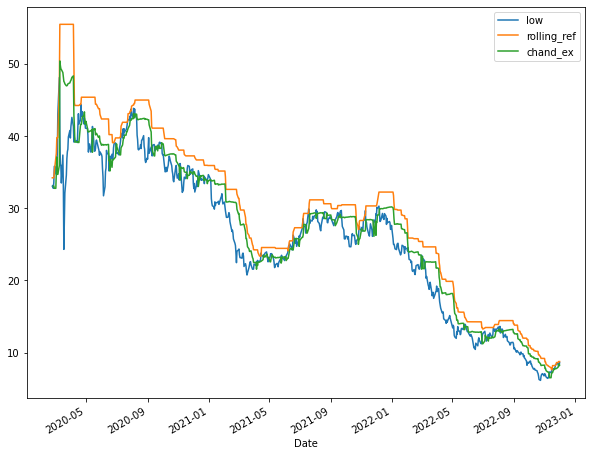

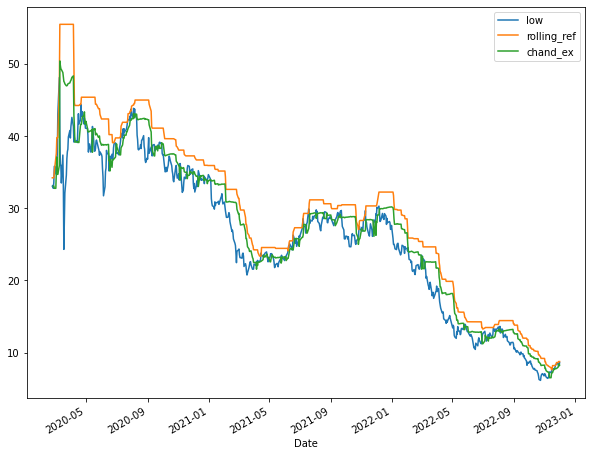

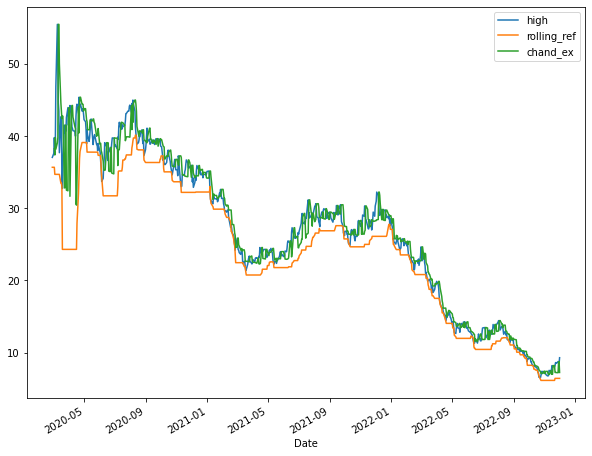

In [12]:
from datalib.heatmapUtil import get_rel_nday_ma_zscore_heatmap
from workflow.sectorRotationTraderWorkflow import batch_sector_rotation_learning
from backtest.chandelierExitBacktester import chandelierExitBacktester, backtest_between, get_long_max_drawdown_details
from datalib.commonUtil import commonUtil as cu
import pandas as pd
import pandas_ta as ta
ew_sector_etf_list=['RCD', 'RYH', 'RYT', 'RGI', 'RHS', 'RTM', 'RYF', 'RSP', 'RYE', 'RYU', 'EQAL', 'EWRE', 'QQEW', 'TLT', 'EMLC', 'EEM' ]
feat_cols=['TLT', 'EQAL', 'RYF', 'EMLC', 'EWRE', 'RTM', 'RYE', 'EEM', 'RYT', 'RYU', 'RHS']
tlist=ew_sector_etf_list.copy()
tlist.append('TMF')
rank_df=get_rel_nday_ma_zscore_heatmap(tlist, list_tag='rank_sector_etf', use_rank=True, zdays=0, pred_date='20210901')
th=0.1
def_pct_stop=0.1
focus_etf_tlist=['TMF', 'UCO']
all_perf_table_bull, all_trades_df_bull, pred_df=batch_sector_rotation_learning(rank_df, focus_tlist=focus_etf_tlist, th=th,  def_pct_stop=def_pct_stop, feat_cols=feat_cols)

all_perf_table_bull.to_csv('results/bull_perf.csv')
all_trades_df_bull.to_csv('results/bull_trades.csv')
dlog(all_perf_table_bull)
dlog(all_trades_df_bull)
assert(len(all_perf_table_bull)>0)
